In [236]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")
 
for decode in ('gbk','utf-8','gb18030'):
    try:    
        data = pd.read_csv(r"C:\Users\u1128714\Desktop\Deep Learning\Arima\data.csv",encoding=decode,error_bad_lines=False)
        print('data-' + decode + '-success!!')
        break
    except:
        pass
#df.index = pd.to_datetime(df.index)  # 将字符串索引转换成时间索引
data.head(10)

data-gbk-success!!


,date,hour,type,成都,绵阳,宜宾,攀枝花,泸州,自贡,德阳,...,乐山,眉山,广安,达州,雅安,巴中,资阳,阿坝州,甘孜州,凉山州
0,20200101,0,AQI,153.00,110.00,177.00,74.00,120.00,170.00,151.00,...,123.0,104.00,88.0,151.00,140.00,69.00,145.00,37.0,45.00,54.00
1,20200101,0,PM2.5,117.00,83.00,134.00,54.00,91.00,129.00,116.00,...,93.0,78.00,65.0,116.00,107.00,50.00,111.00,26.0,27.00,37.00
2,20200101,0,PM10,143.00,115.00,155.00,90.00,131.00,158.00,137.00,...,116.0,100.00,91.0,155.00,146.00,62.00,142.00,36.0,45.00,57.00
3,20200101,0,SO2,5.00,6.00,7.00,18.00,11.00,7.00,3.00,...,9.0,9.00,5.0,9.00,7.00,3.00,5.00,7.0,11.00,12.00
4,20200101,0,NO2,49.00,27.00,49.00,70.00,54.00,40.00,49.00,...,41.0,35.00,26.0,43.00,45.00,31.00,46.00,21.0,50.00,35.00
5,20200101,0,O3,18.00,30.00,3.00,11.00,3.00,6.00,5.00,...,23.0,34.00,21.0,22.00,25.00,13.00,10.00,24.0,32.00,40.00
6,20200101,0,CO,0.89,0.82,1.15,1.82,1.23,1.07,0.97,...,0.8,0.97,0.9,1.23,1.23,0.77,0.95,0.8,0.55,0.68
7,20200101,1,AQI,149.00,111.00,180.00,70.00,134.00,174.00,146.00,...,115.0,101.00,89.0,148.00,121.00,69.00,136.00,33.0,37.00,54.00
8,20200101,1,PM2.5,114.00,84.00,136.00,51.00,102.00,132.00,112.00,...,87.0,76.00,66.0,113.00,92.00,50.00,104.00,23.0,24.00,38.00
9,20200101,1,PM10,139.00,112.00,160.00,82.00,138.00,159.00,129.00,...,127.0,107.00,90.0,150.00,128.00,61.00,137.00,22.0,37.00,57.00


In [237]:
data_type = data[data.type.isin(['AQI', 'PM2.5', 'PM10'])]
data_raw = data_type[['date', 'hour', 'type', '成都', '凉山州']]
data_raw.describe()

,date,hour,成都,凉山州
count,5.233800e+04,52338.000000,52219.000000,52251.000000
mean,2.020565e+07,11.505044,55.269787,32.046525
std,5.012391e+03,6.921627,37.179223,26.772868
min,2.020010e+07,0.000000,1.000000,1.000000
25%,2.020070e+07,6.000000,28.000000,18.000000
50%,2.020123e+07,12.000000,47.000000,27.000000
75%,2.021070e+07,18.000000,73.000000,40.000000
max,2.021123e+07,23.000000,309.000000,742.000000


In [238]:
# 移动平均图
from statsmodels.tsa.stattools import adfuller

def draw_trend(timeseries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeseries.rolling(window=size).mean()
    # 对size个数据移动平均的方差
    rol_std = timeseries.rolling(window=size).std()
    
    plt.figure(num=3, figsize=(40,10))
    plt.plot(timeseries,color='blue', label='Original')
    plt.plot(rol_mean,color='red', label='Rolling Mean')
    plt.plot(rol_std,color='black', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
 
def draw_ts(timeseries):
    f = plt.figure(facecolor='white')
    timeseries.plot(color='blue')
    plt.show()
 
#Dickey-Fuller test:
def teststationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

#数据平稳后，需要对模型定阶，即确定p、q的阶数
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def draw_acf_pacf(ts,lags):
    f = plt.figure(facecolor='white', figsize=(60, 10))
    ax1 = f.add_subplot(211)
    plot_acf(ts,ax=ax1,lags=lags)
    ax2 = f.add_subplot(212)
    plot_pacf(ts,ax=ax2,lags=lags)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

# 成都

## 成都 AQI

In [239]:
CQ_AQI = data_raw.query("type=='AQI'")[["date", "hour", "type", "成都"]]
CQ_AQI["date_hour"]=CQ_AQI["date"].map(str)+CQ_AQI["hour"].map(str)
CQ_AQI["date_hour"] = CQ_AQI["date_hour"].map(lambda x: datetime.strptime(x, '%Y%m%d%H'))
CQ_AQI = CQ_AQI[["date_hour", "成都"]].rename(columns={'成都':'AQI'}).set_index('date_hour')
CQ_AQI

,AQI
date_hour,
2020-01-01 00:00:00,153.0
2020-01-01 01:00:00,149.0
2020-01-01 02:00:00,146.0
2020-01-01 03:00:00,151.0
2020-01-01 04:00:00,141.0
...,...
2021-12-31 19:00:00,90.0
2021-12-31 20:00:00,99.0
2021-12-31 21:00:00,106.0


In [240]:
#缺失值
CQ_AQI[CQ_AQI.isnull().any(axis=1)==True]
CQ_AQI = CQ_AQI.fillna(method='pad')

<Figure size 432x288 with 0 Axes>

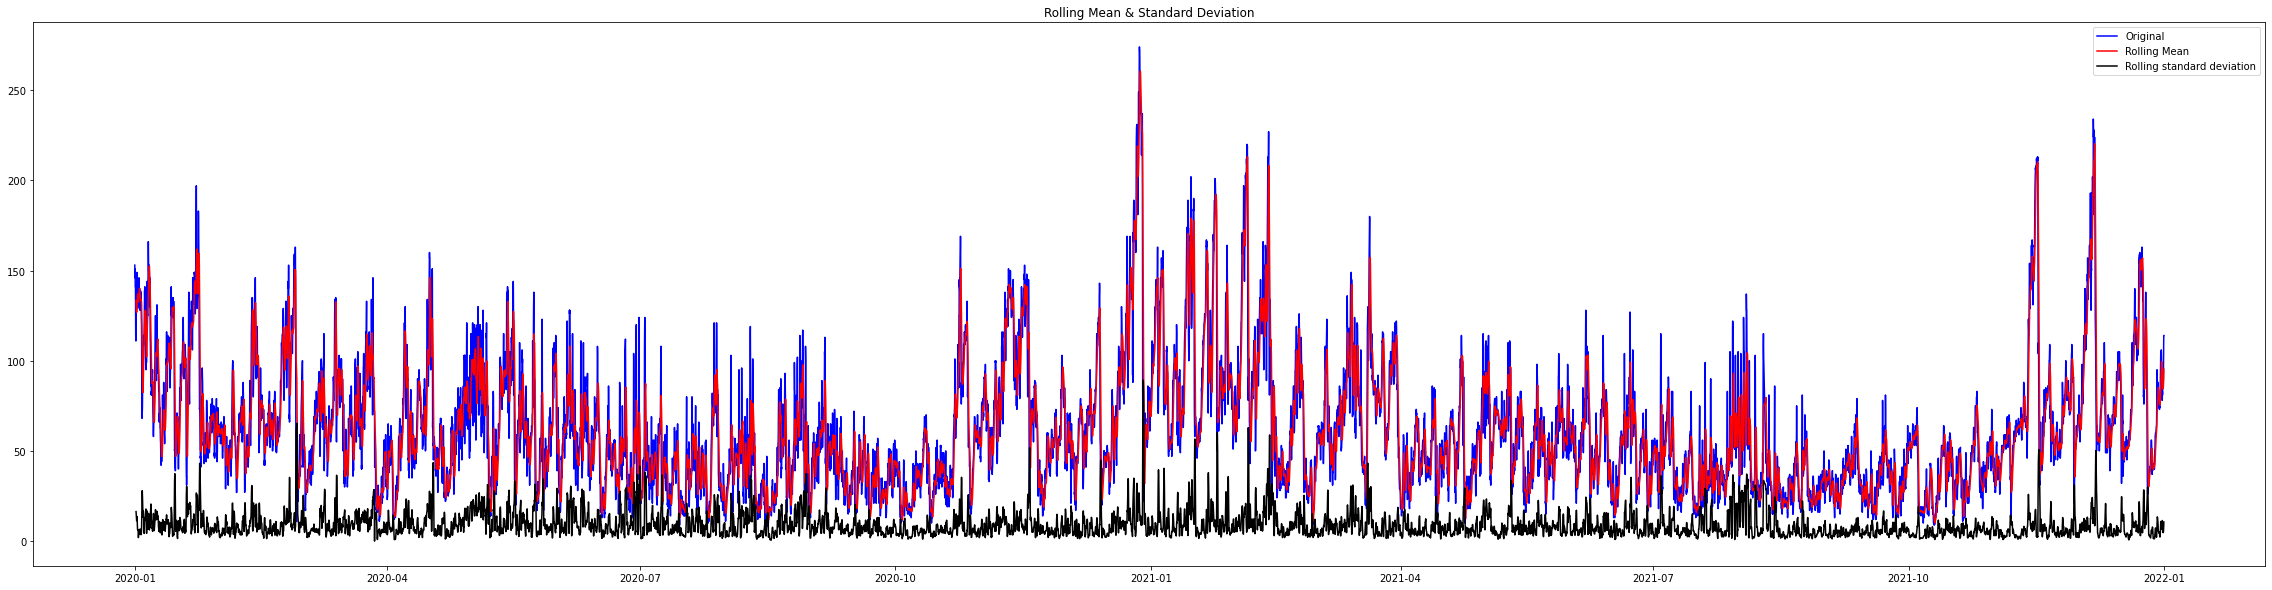

In [241]:
draw_trend(CQ_AQI,12)

In [242]:
teststationarity(CQ_AQI)
#t统计量在99%的置信水平下是显著的


Test Statistic                -9.137957e+00
p-value                        2.901080e-15
#Lags Used                     4.300000e+01
Number of Observations Used    1.740200e+04
Critical Value (1%)           -3.430726e+00
Critical Value (5%)           -2.861706e+00
Critical Value (10%)          -2.566858e+00
dtype: float64

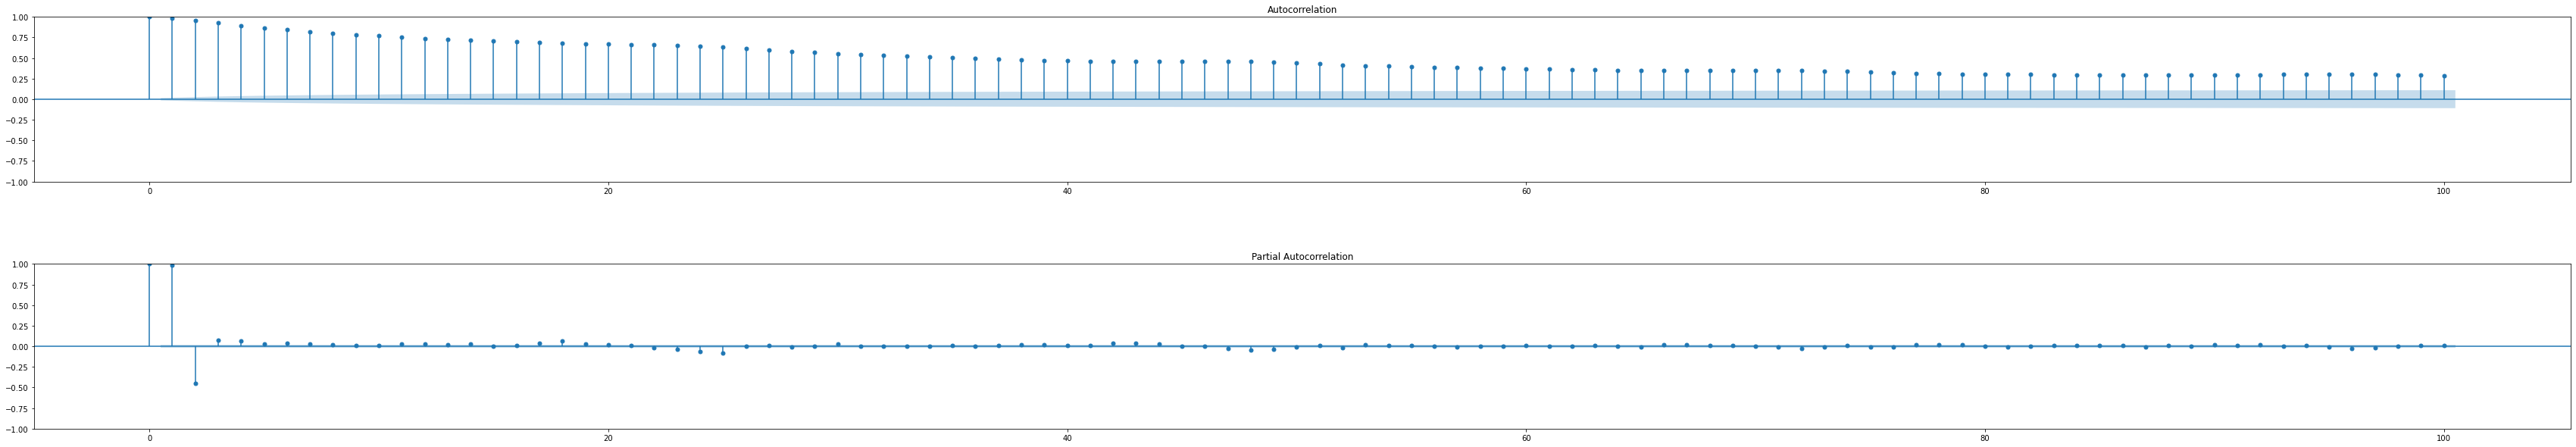

In [243]:
draw_acf_pacf(CQ_AQI,100)

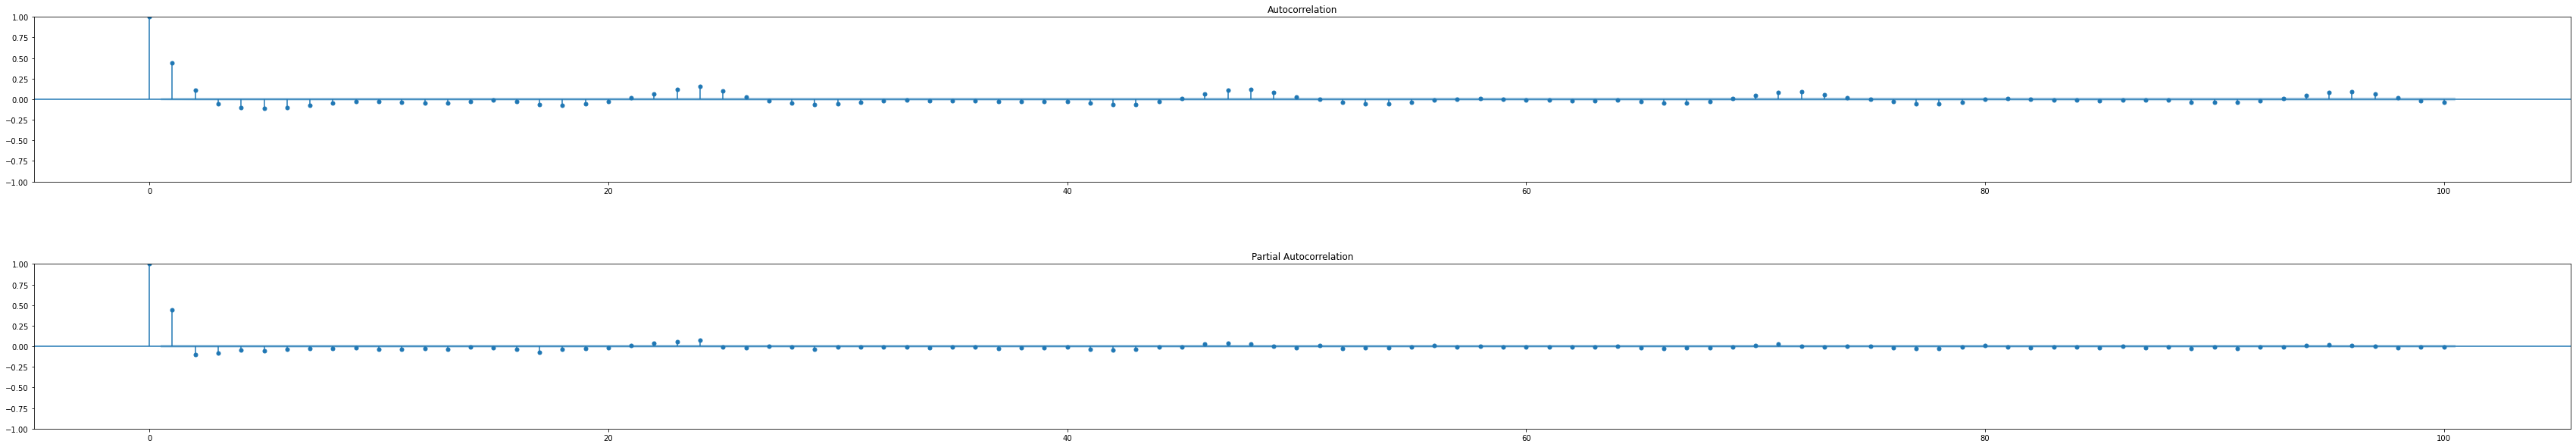

In [244]:
#一阶差分
diff_1 = CQ_AQI.diff(1).dropna()
draw_acf_pacf(diff_1,100)

In [245]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff_1, order=(2,1,1)) 
result_arima = model.fit()

In [246]:
predict_ts = result_arima.predict()
# 一阶差分还原
diff_shift_ts = diff_1.shift(1).squeeze()
df_predict = predict_ts.to_frame(name='predict')
df_AQI_CD = pd.merge(diff_shift_ts,df_predict,left_index=True,right_index=True)
df_AQI_CD = df_AQI_CD.dropna(axis=0)
df_AQI_CD



,AQI,predict
date_hour,,
2020-01-01 02:00:00,-4.0,-3.999964
2020-01-01 03:00:00,-3.0,-3.207068
2020-01-01 04:00:00,5.0,2.666781
2020-01-01 05:00:00,-10.0,-7.988925
2020-01-01 06:00:00,0.0,-0.282529
...,...,...
2021-12-31 19:00:00,2.0,1.369797
2021-12-31 20:00:00,2.0,0.768703
2021-12-31 21:00:00,9.0,4.168363


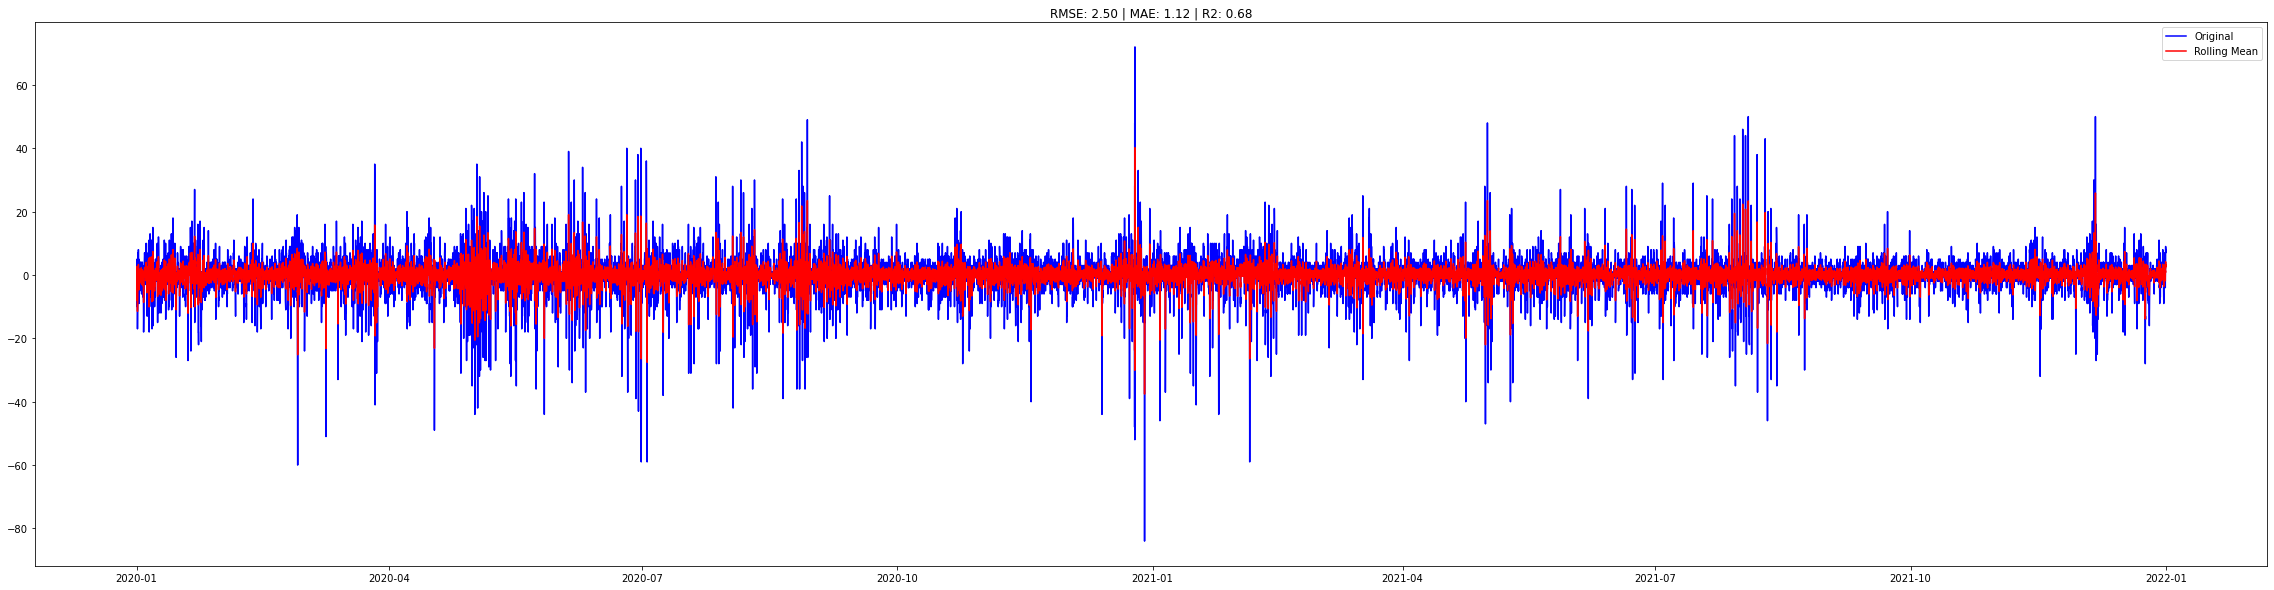

In [247]:
plt.figure(num=2, figsize=(40,10))
plt.plot(df_AQI_CD.AQI,color='blue', label='Original')
plt.plot(df_AQI_CD.predict,color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('RMSE: %.2f | MAE: %.2f | R2: %.2f'% (np.sqrt(sum((df_AQI_CD.predict-df_AQI_CD.AQI)**2)/df_AQI_CD.size),sum(abs(df_AQI_CD.predict-df_AQI_CD.AQI))/df_AQI_CD.size, 1-sum((df_AQI_CD.predict-df_AQI_CD.AQI)**2)/sum((df_AQI_CD.AQI - sum(df_AQI_CD.AQI)/df_AQI_CD.size)**2)))
plt.show()

In [248]:
##diff_recover_1 = predict_ts.add(diff_shift_ts)
##diff_recover_1 = diff_recover_1.dropna()
##diff_recover_1

## 成都 PM2.5

In [249]:
CQ_PM25 = data_raw.query("type=='PM2.5'")[["date", "hour", "type", "成都"]]
CQ_PM25["date_hour"]=CQ_PM25["date"].map(str)+CQ_PM25["hour"].map(str)
CQ_PM25["date_hour"] = CQ_PM25["date_hour"].map(lambda x: datetime.strptime(x, '%Y%m%d%H'))
CQ_PM25 = CQ_PM25[["date_hour", "成都"]].rename(columns={'成都':'PM25'}).set_index('date_hour')
CQ_PM25

,PM25
date_hour,
2020-01-01 00:00:00,117.0
2020-01-01 01:00:00,114.0
2020-01-01 02:00:00,112.0
2020-01-01 03:00:00,116.0
2020-01-01 04:00:00,108.0
...,...
2021-12-31 19:00:00,67.0
2021-12-31 20:00:00,74.0
2021-12-31 21:00:00,80.0


<Figure size 432x288 with 0 Axes>

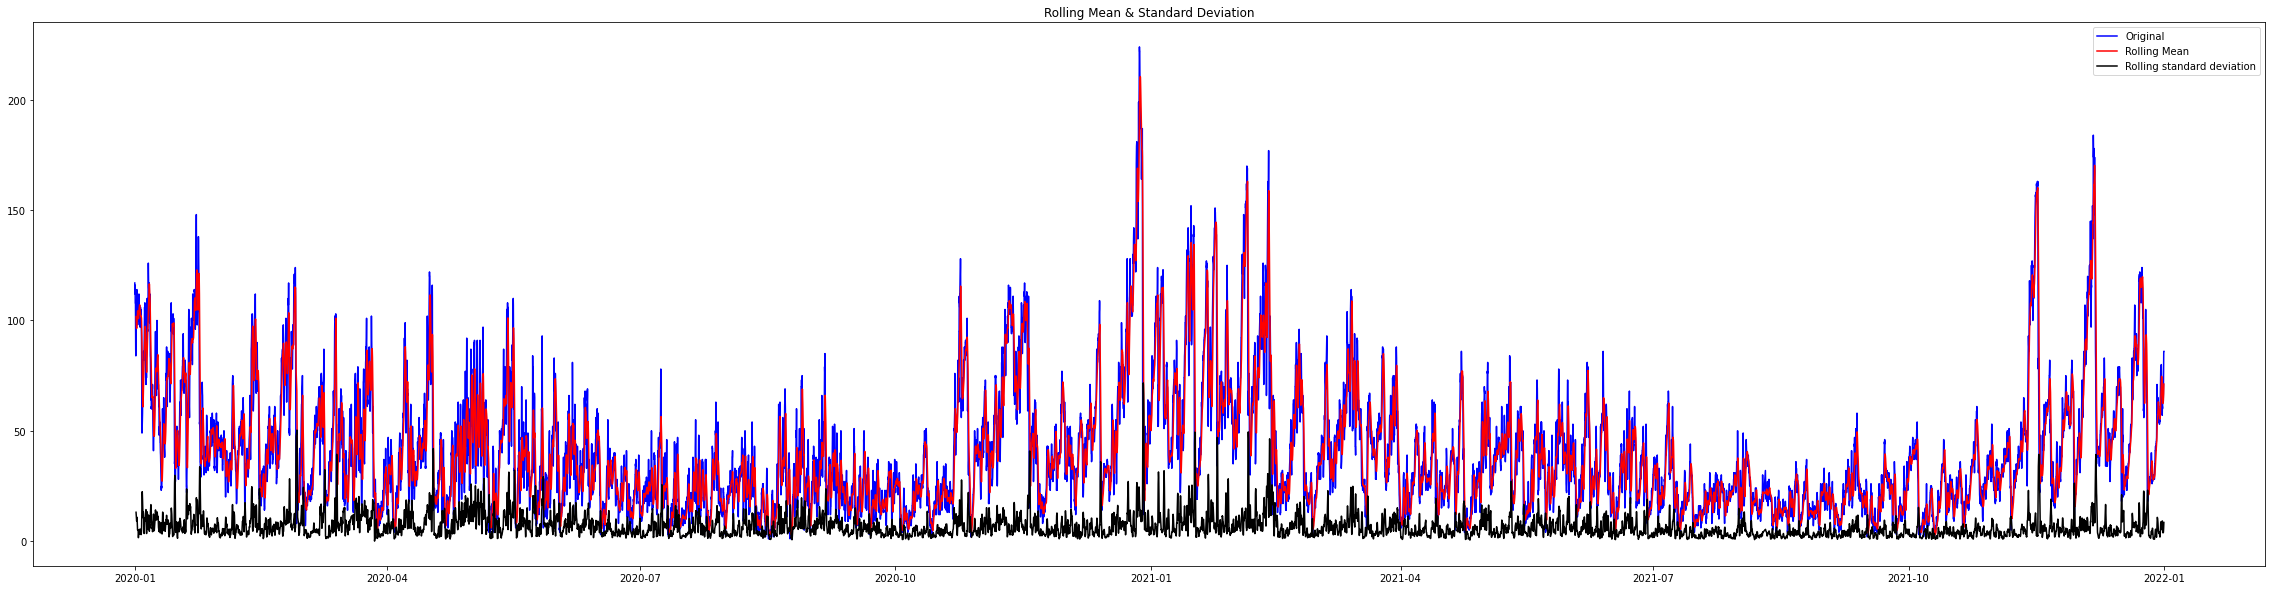

In [250]:
#缺失值
CQ_PM25[CQ_PM25.isnull().any(axis=1)==True]
CQ_PM25 = CQ_PM25.fillna(method='pad')
draw_trend(CQ_PM25,12)

In [251]:
teststationarity(CQ_PM25)
#t统计量在99%的置信水平下是显著的

Test Statistic                -8.994146e+00
p-value                        6.765864e-15
#Lags Used                     4.200000e+01
Number of Observations Used    1.740300e+04
Critical Value (1%)           -3.430726e+00
Critical Value (5%)           -2.861706e+00
Critical Value (10%)          -2.566858e+00
dtype: float64

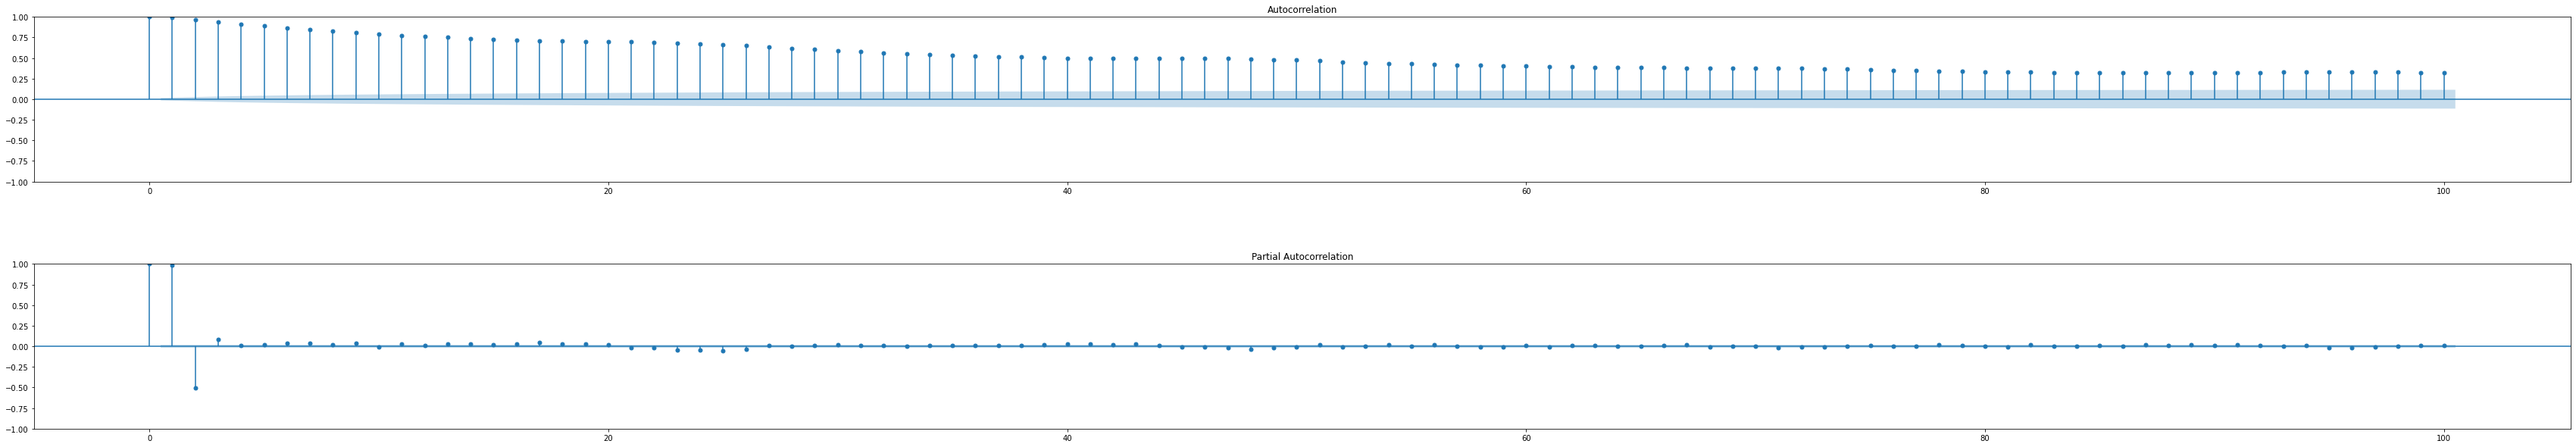

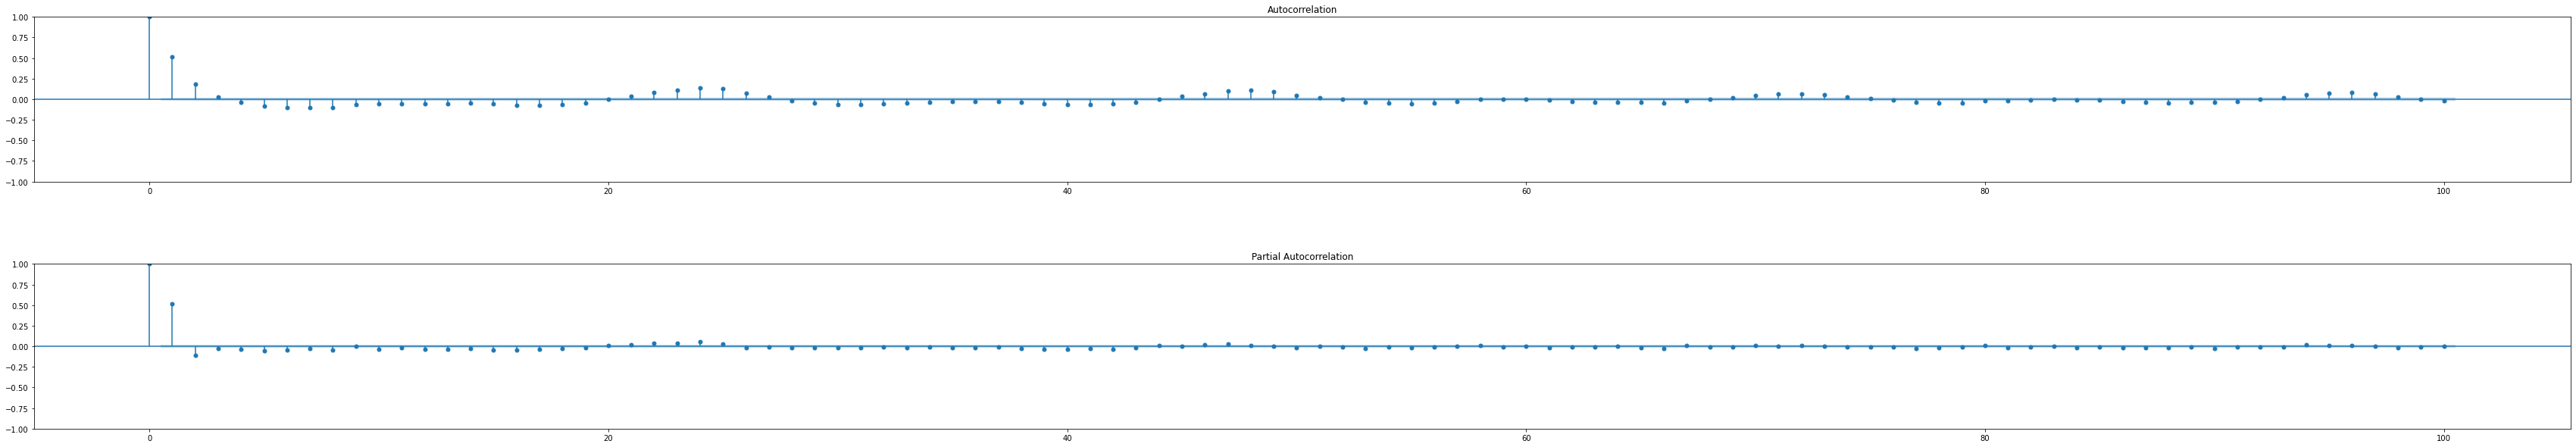

In [252]:
draw_acf_pacf(CQ_PM25,100)

#一阶差分
diff_1 = CQ_PM25.diff(1).dropna()
draw_acf_pacf(diff_1,100)

In [253]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff_1, order=(2,1,1)) 
result_arima = model.fit()
predict_ts = result_arima.predict()
# 一阶差分还原
diff_shift_ts = diff_1.shift(1).squeeze()
df_predict = predict_ts.to_frame(name='predict')
df_PM25_CD = pd.merge(diff_shift_ts,df_predict,left_index=True,right_index=True)
df_PM25_CD = df_PM25_CD.dropna(axis=0)
df_PM25_CD

,PM25,predict
date_hour,,
2020-01-01 02:00:00,-3.0,-2.999991
2020-01-01 03:00:00,-2.0,-2.163737
2020-01-01 04:00:00,4.0,2.557067
2020-01-01 05:00:00,-8.0,-6.863536
2020-01-01 06:00:00,0.0,0.031148
...,...,...
2021-12-31 19:00:00,1.0,0.883970
2021-12-31 20:00:00,2.0,1.023830
2021-12-31 21:00:00,7.0,3.747444


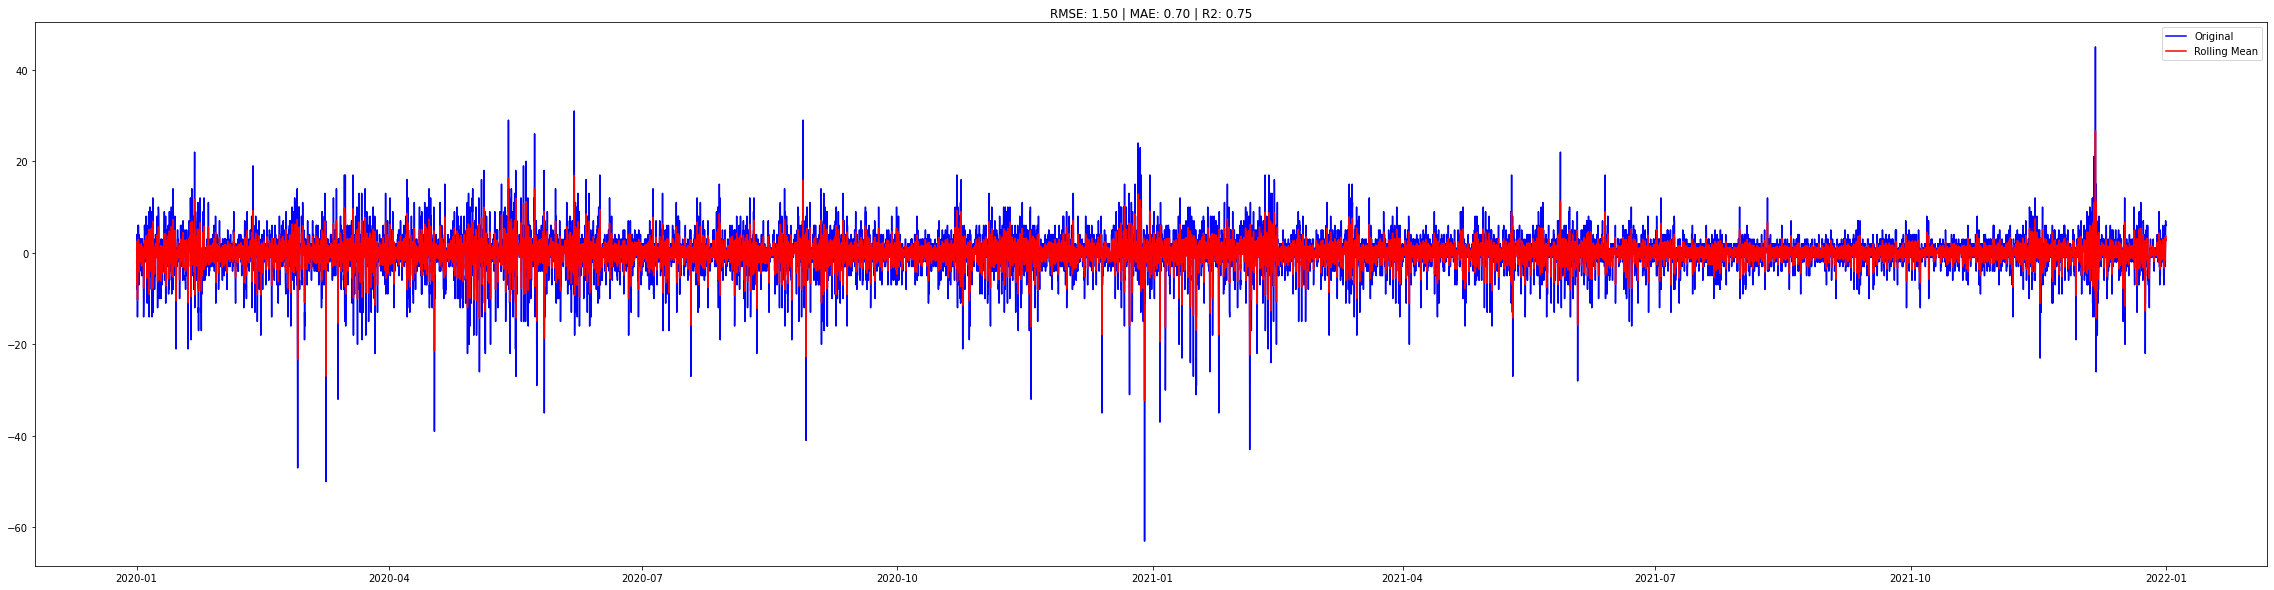

In [254]:
plt.figure(num=2, figsize=(40,10))
plt.plot(df_PM25_CD.PM25,color='blue', label='Original')
plt.plot(df_PM25_CD.predict,color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('RMSE: %.2f | MAE: %.2f | R2: %.2f'% (np.sqrt(sum((df_PM25_CD.predict-df_PM25_CD.PM25)**2)/df_PM25_CD.size),sum(abs(df_PM25_CD.predict-df_PM25_CD.PM25))/df_PM25_CD.size, 1-sum((df_PM25_CD.predict-df_PM25_CD.PM25)**2)/sum((df_PM25_CD.PM25 - sum(df_PM25_CD.PM25)/df_PM25_CD.size)**2)))

plt.show()

## 成都 PM10

<Figure size 432x288 with 0 Axes>

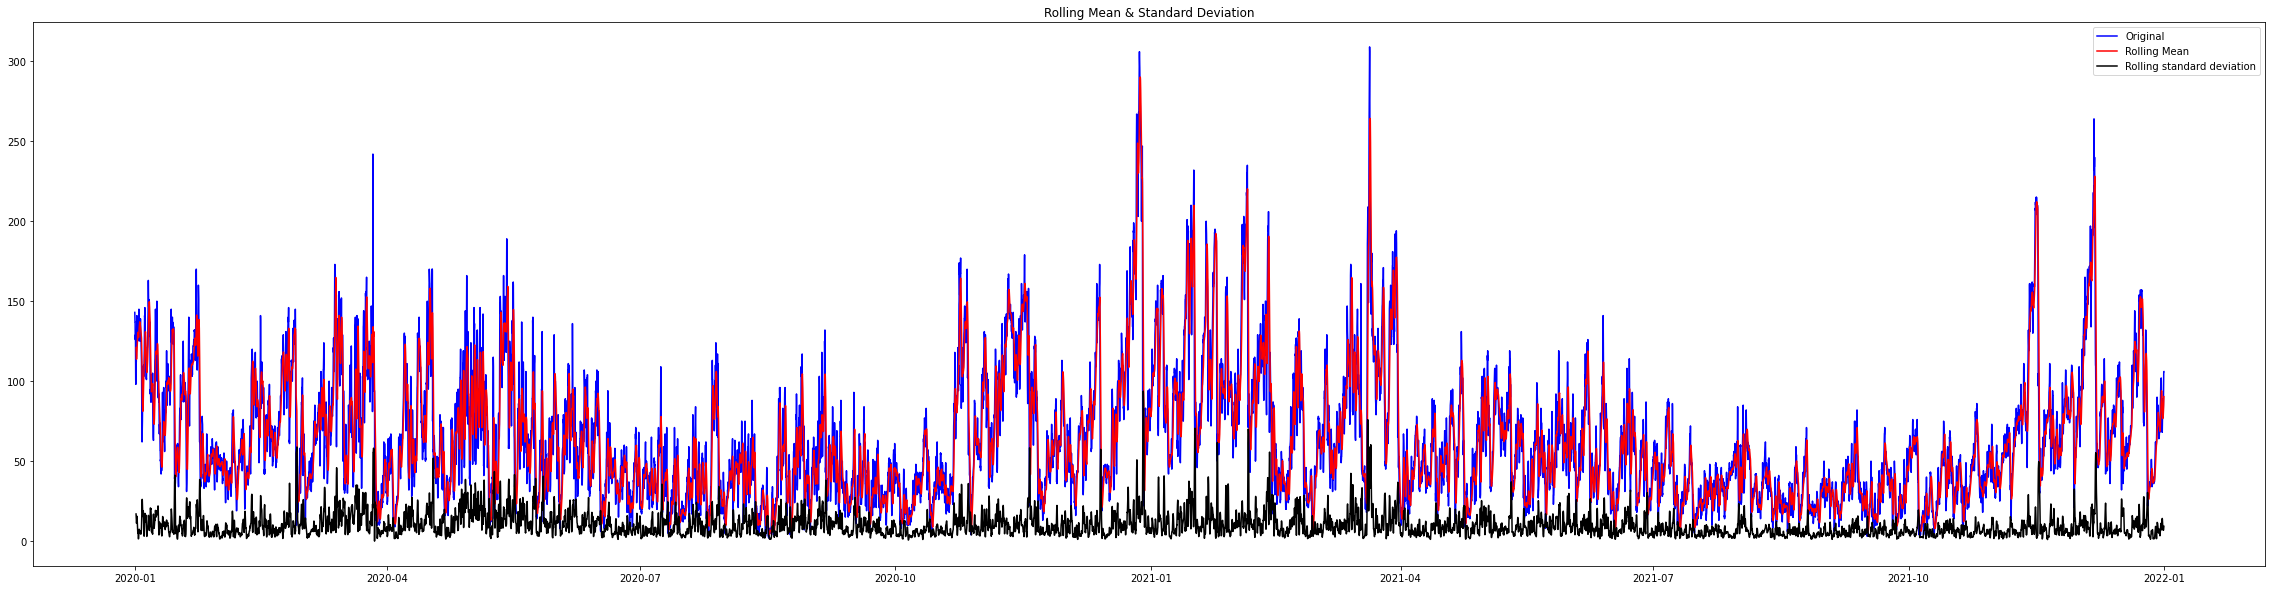

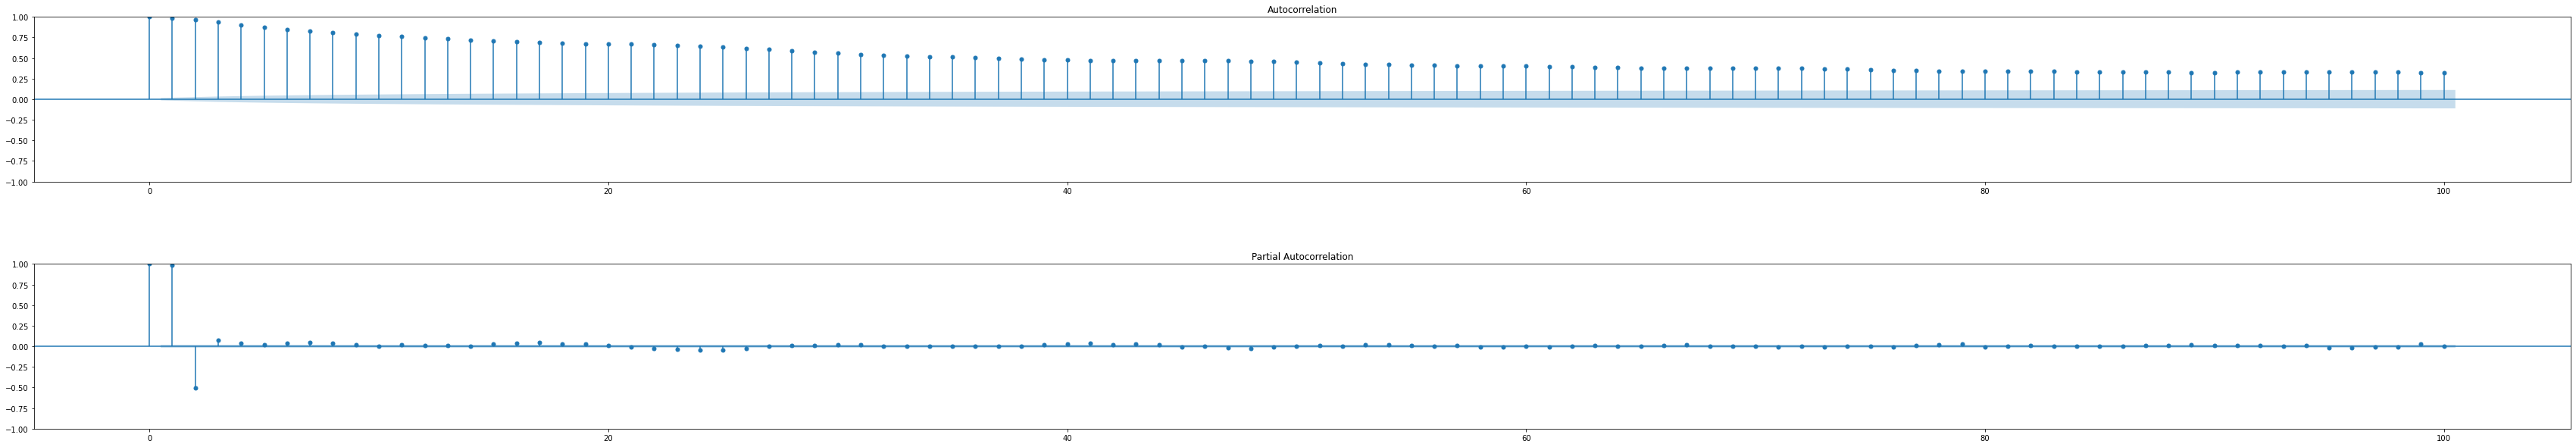

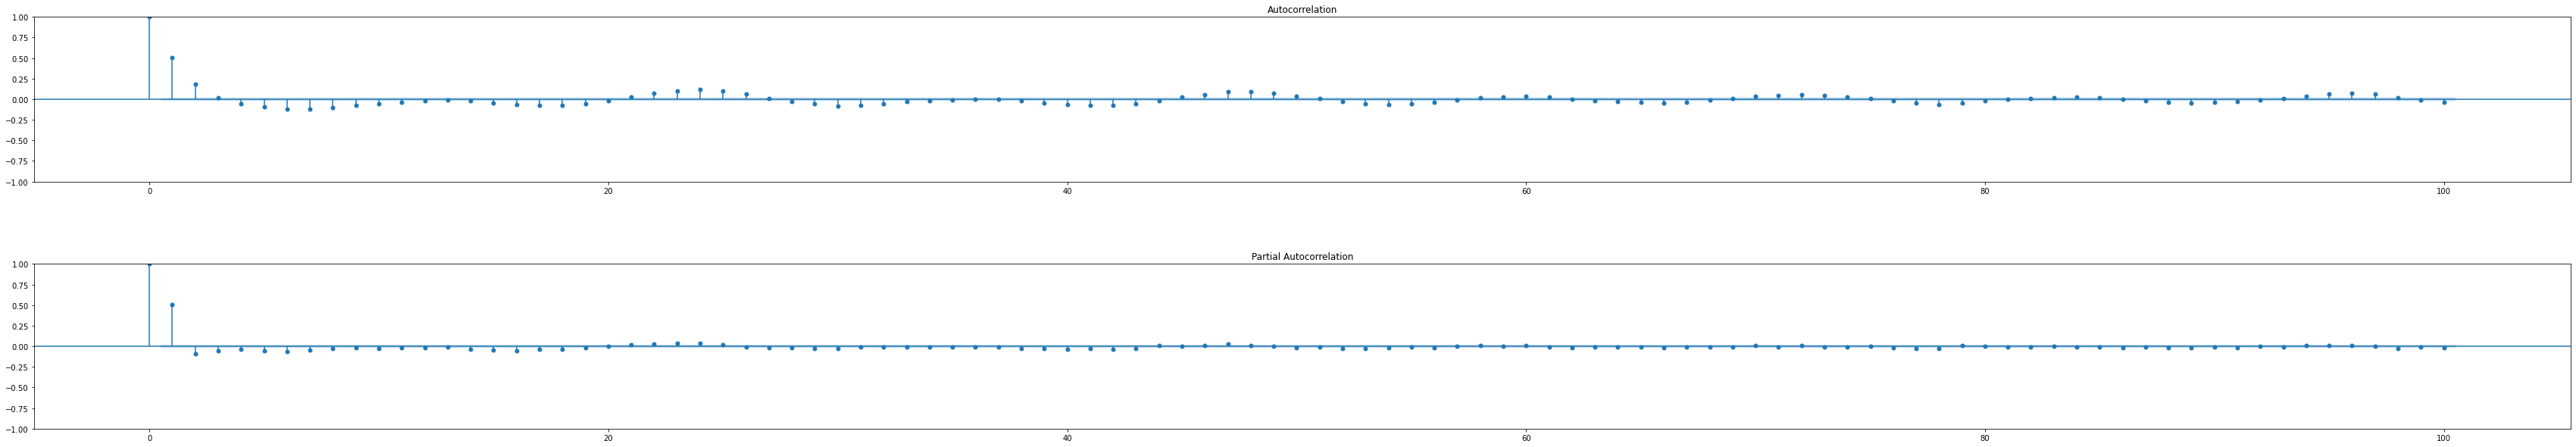

In [255]:
CQ_PM10 = data_raw.query("type=='PM10'")[["date", "hour", "type", "成都"]]
CQ_PM10["date_hour"]=CQ_PM10["date"].map(str)+CQ_PM10["hour"].map(str)
CQ_PM10["date_hour"] = CQ_PM10["date_hour"].map(lambda x: datetime.strptime(x, '%Y%m%d%H'))
CQ_PM10 = CQ_PM10[["date_hour", "成都"]].rename(columns={'成都':'PM10'}).set_index('date_hour')

#缺失值
CQ_PM10[CQ_PM10.isnull().any(axis=1)==True]
CQ_PM10 = CQ_PM10.fillna(method='pad')
draw_trend(CQ_PM10,12)
teststationarity(CQ_PM10)

draw_acf_pacf(CQ_PM10,100)
#一阶差分
diff_1 = CQ_PM10.diff(1).dropna()
draw_acf_pacf(diff_1,100)

In [256]:
model = ARIMA(diff_1, order=(2,1,1)) 
result_arima = model.fit()
predict_ts = result_arima.predict()
# 一阶差分还原
diff_shift_ts = diff_1.shift(1).squeeze()
df_predict = predict_ts.to_frame(name='predict')
df_PM10_CD = pd.merge(diff_shift_ts,df_predict,left_index=True,right_index=True)
df_PM10_CD = df_PM10_CD.dropna(axis=0)
df_PM10_CD

,PM10,predict
date_hour,,
2020-01-01 02:00:00,-4.0,-3.999971
2020-01-01 03:00:00,-2.0,-2.357068
2020-01-01 04:00:00,0.0,-0.899056
2020-01-01 05:00:00,-11.0,-9.027345
2020-01-01 06:00:00,0.0,-0.533628
...,...,...
2021-12-31 19:00:00,1.0,0.825968
2021-12-31 20:00:00,2.0,1.006750
2021-12-31 21:00:00,8.0,4.217502


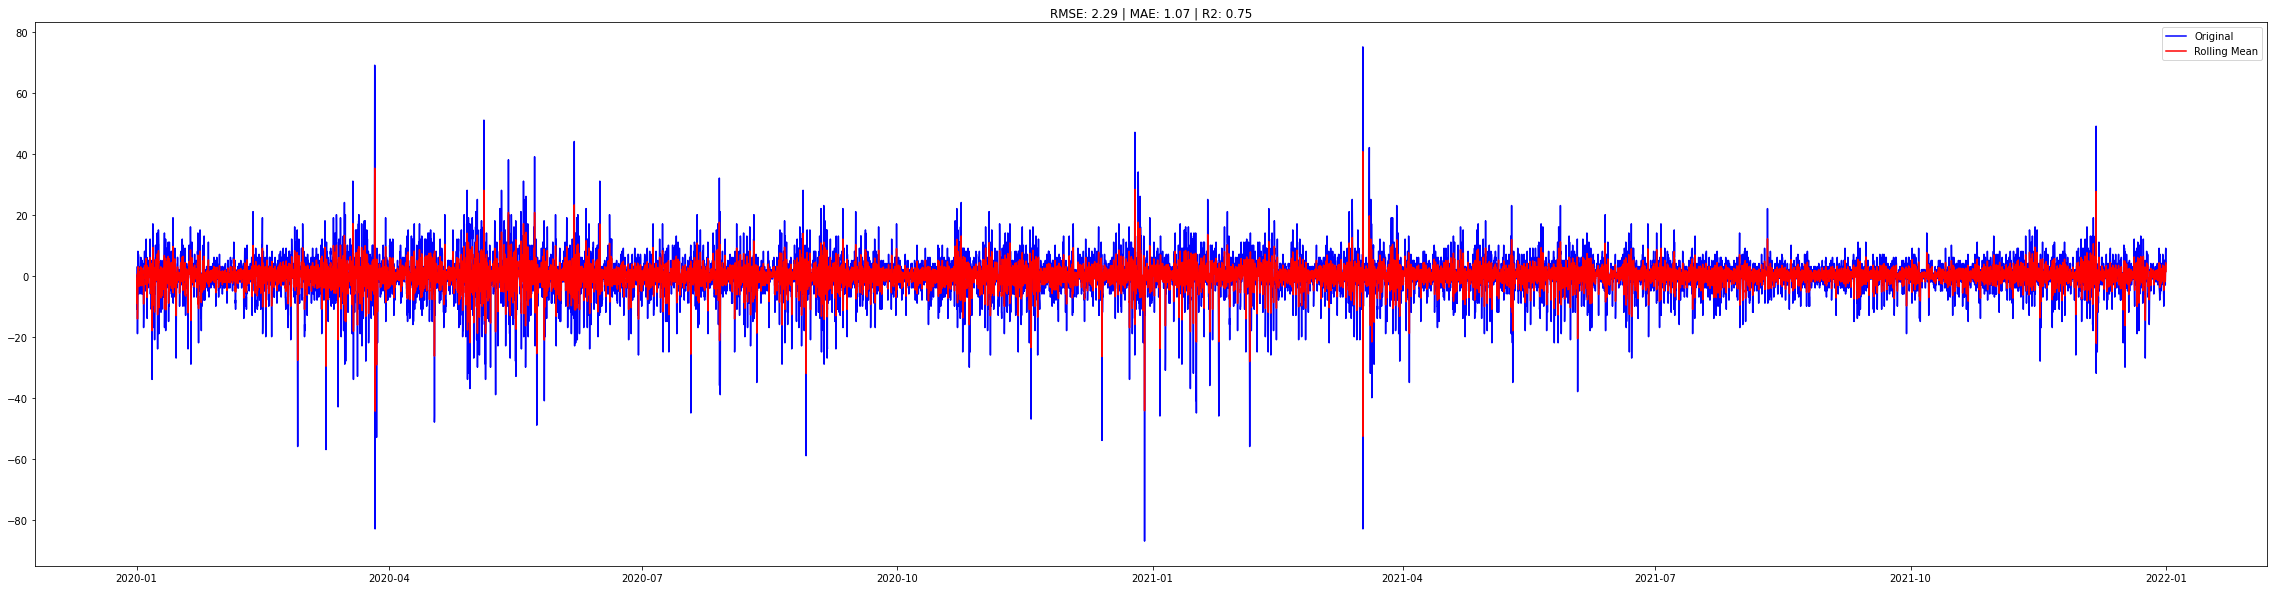

In [257]:
plt.figure(num=2, figsize=(40,10))
plt.plot(df_PM10_CD.PM10,color='blue', label='Original')
plt.plot(df_PM10_CD.predict,color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('RMSE: %.2f | MAE: %.2f | R2: %.2f'% (np.sqrt(sum((df_PM10_CD.predict-df_PM10_CD.PM10)**2)/df_PM10_CD.size),sum(abs(df_PM10_CD.predict-df_PM10_CD.PM10))/df_PM10_CD.size, 1-sum((df_PM10_CD.predict-df_PM10_CD.PM10)**2)/sum((df_PM10_CD.PM10 - sum(df_PM10_CD.PM10)/df_PM10_CD.size)**2)))
plt.show()

# 凉山州

## 凉山州 AQI

In [258]:
CQ_AQI = data_raw.query("type=='AQI'")[["date", "hour", "type", "凉山州"]]
CQ_AQI["date_hour"]=CQ_AQI["date"].map(str)+CQ_AQI["hour"].map(str)
CQ_AQI["date_hour"] = CQ_AQI["date_hour"].map(lambda x: datetime.strptime(x, '%Y%m%d%H'))
CQ_AQI = CQ_AQI[["date_hour", "凉山州"]].rename(columns={'凉山州':'AQI'}).set_index('date_hour')
CQ_AQI

,AQI
date_hour,
2020-01-01 00:00:00,54.0
2020-01-01 01:00:00,54.0
2020-01-01 02:00:00,45.0
2020-01-01 03:00:00,39.0
2020-01-01 04:00:00,41.0
...,...
2021-12-31 19:00:00,47.0
2021-12-31 20:00:00,38.0
2021-12-31 21:00:00,40.0


<Figure size 432x288 with 0 Axes>

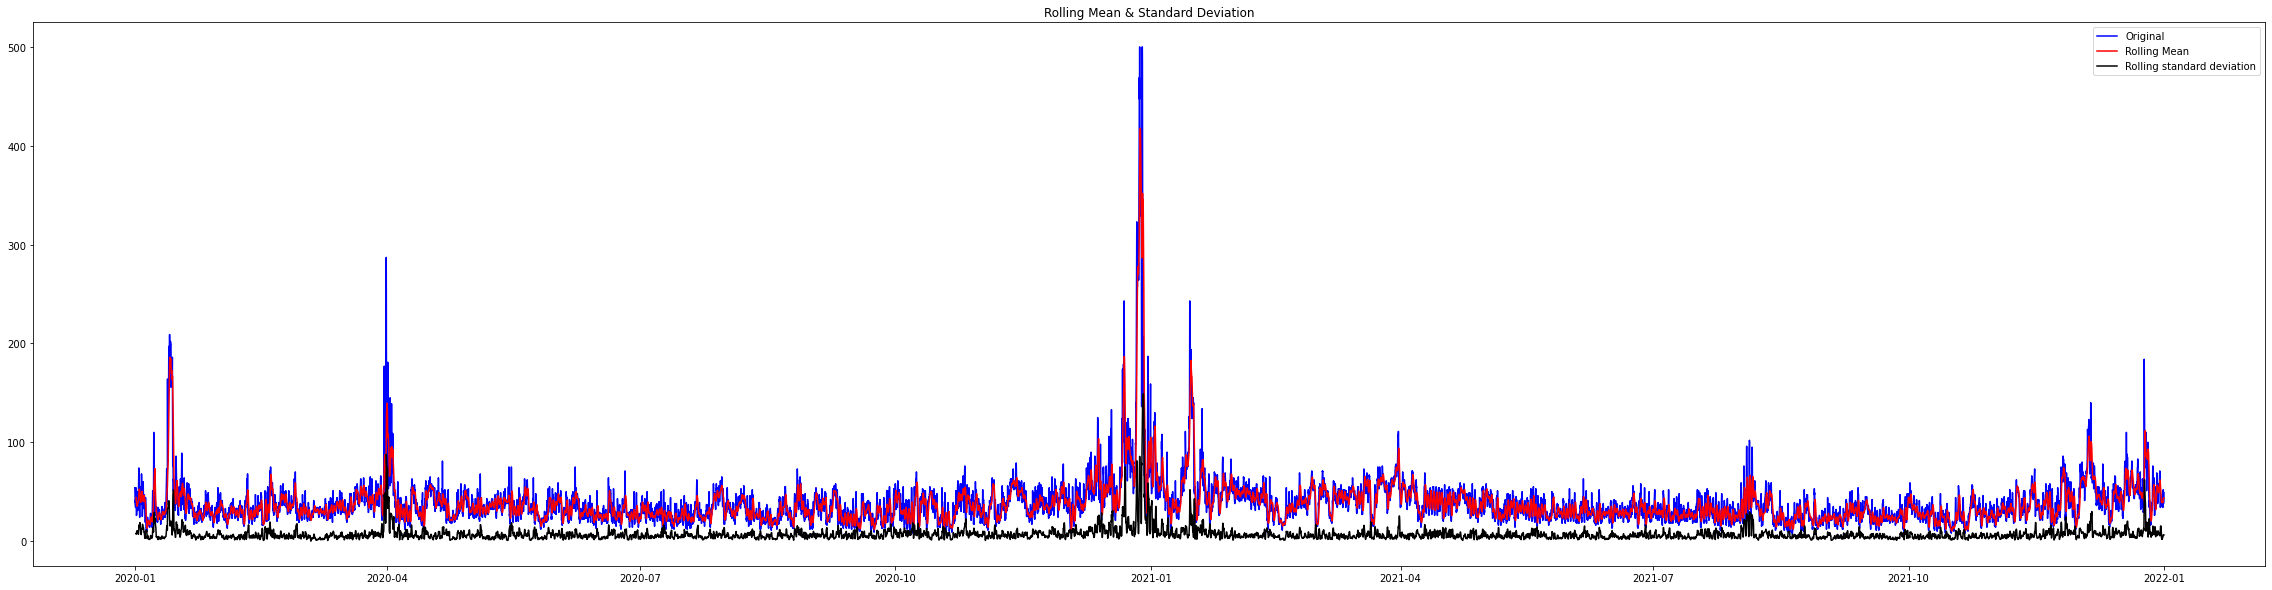

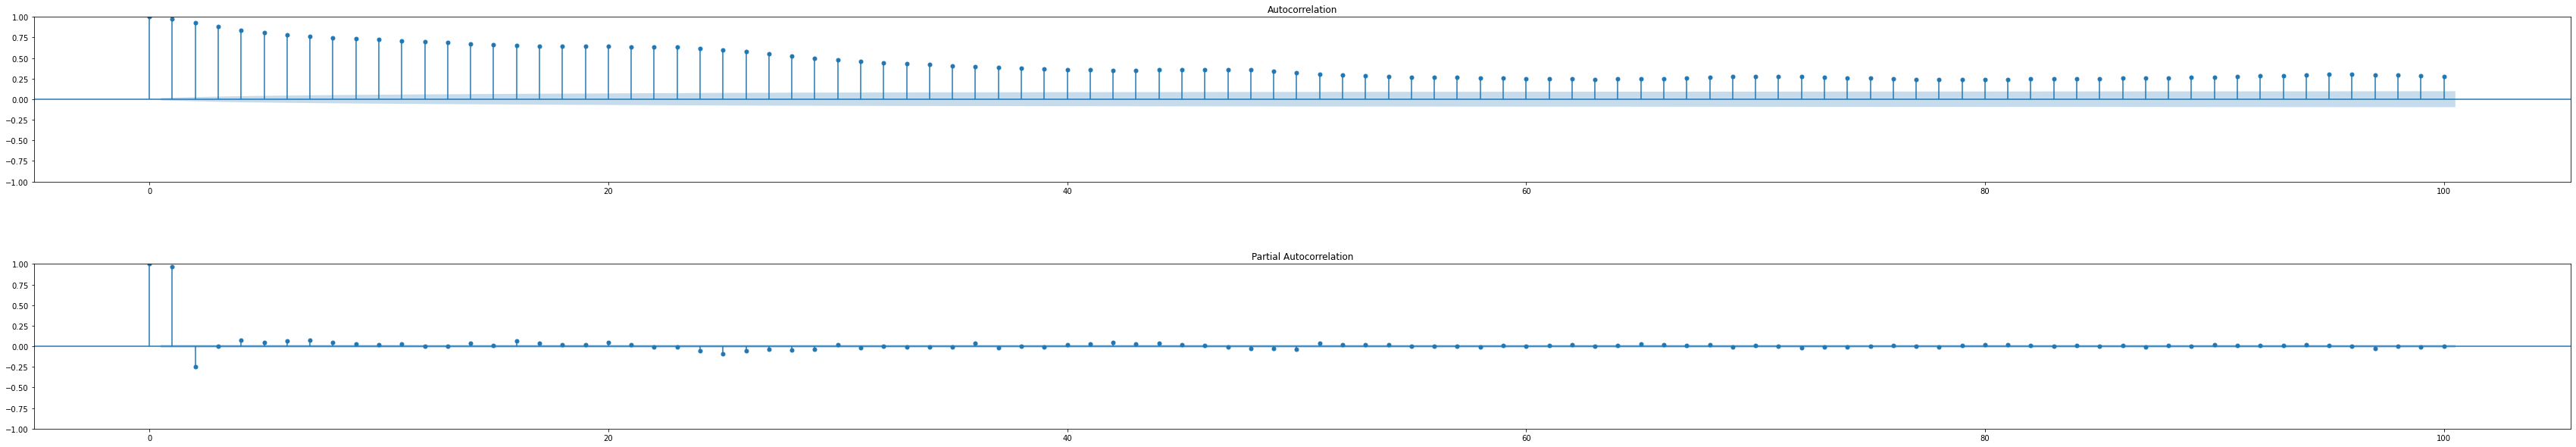

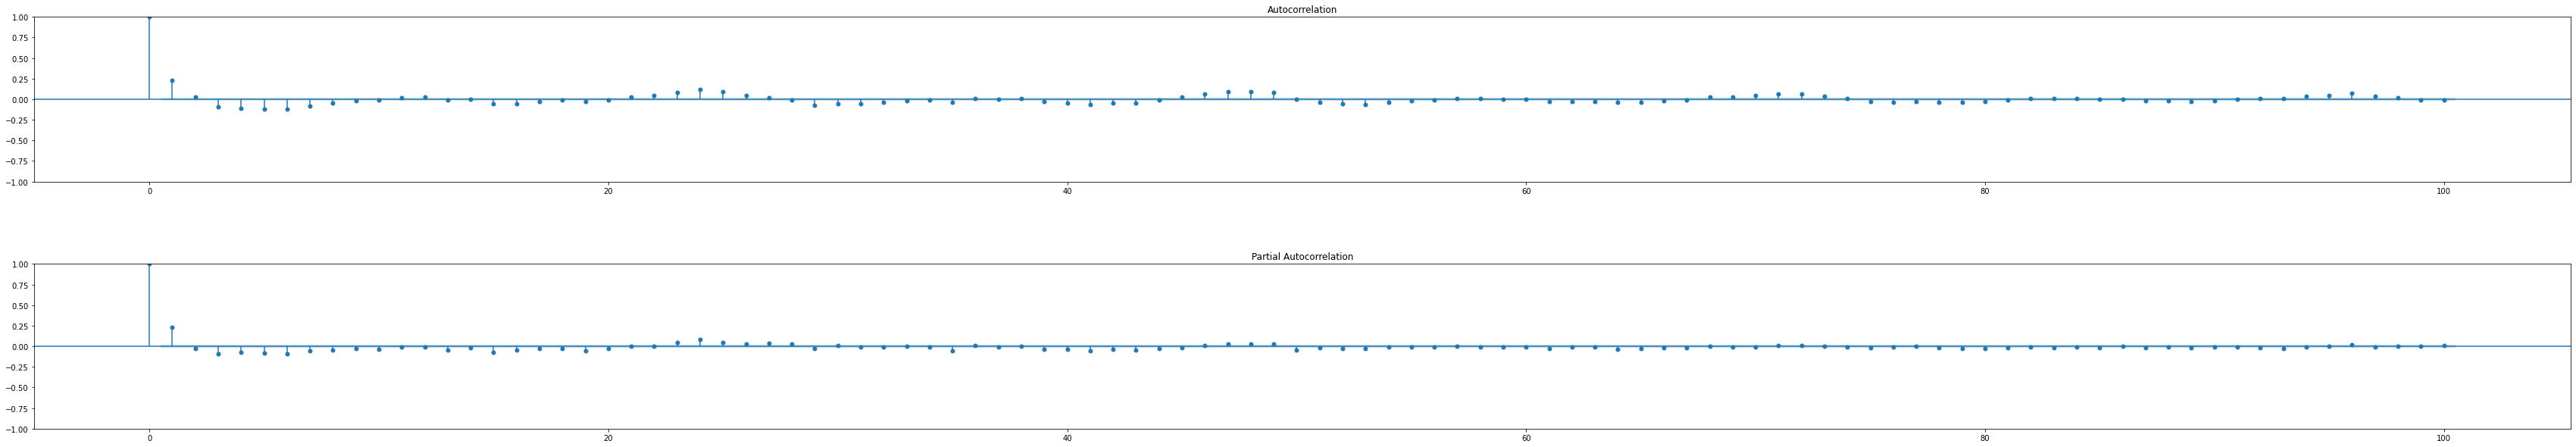

In [259]:
#缺失值
CQ_AQI[CQ_AQI.isnull().any(axis=1)==True]
CQ_AQI = CQ_AQI.fillna(method='pad')

draw_trend(CQ_AQI,12)
teststationarity(CQ_AQI)
#t统计量在99%的置信水平下是显著的

draw_acf_pacf(CQ_AQI,100)
#一阶差分
diff_1 = CQ_AQI.diff(1).dropna()
draw_acf_pacf(diff_1,100)

In [260]:
model = ARIMA(diff_1, order=(1,1,1)) 
result_arima = model.fit()
predict_ts = result_arima.predict()
# 一阶差分还原
diff_shift_ts = diff_1.shift(1).squeeze()
df_predict = predict_ts.to_frame(name='predict')
df_AQI_CD = pd.merge(diff_shift_ts,df_predict,left_index=True,right_index=True)
df_AQI_CD = df_AQI_CD.dropna(axis=0)
df_AQI_CD


,AQI,predict
date_hour,,
2020-01-01 02:00:00,0.0,0.000000
2020-01-01 03:00:00,-9.0,-5.546678
2020-01-01 04:00:00,-6.0,-4.974563
2020-01-01 05:00:00,2.0,-1.599564
2020-01-01 06:00:00,-5.0,-3.834351
...,...,...
2021-12-31 19:00:00,0.0,-0.000054
2021-12-31 20:00:00,-5.0,-1.163382
2021-12-31 21:00:00,-9.0,-2.094273


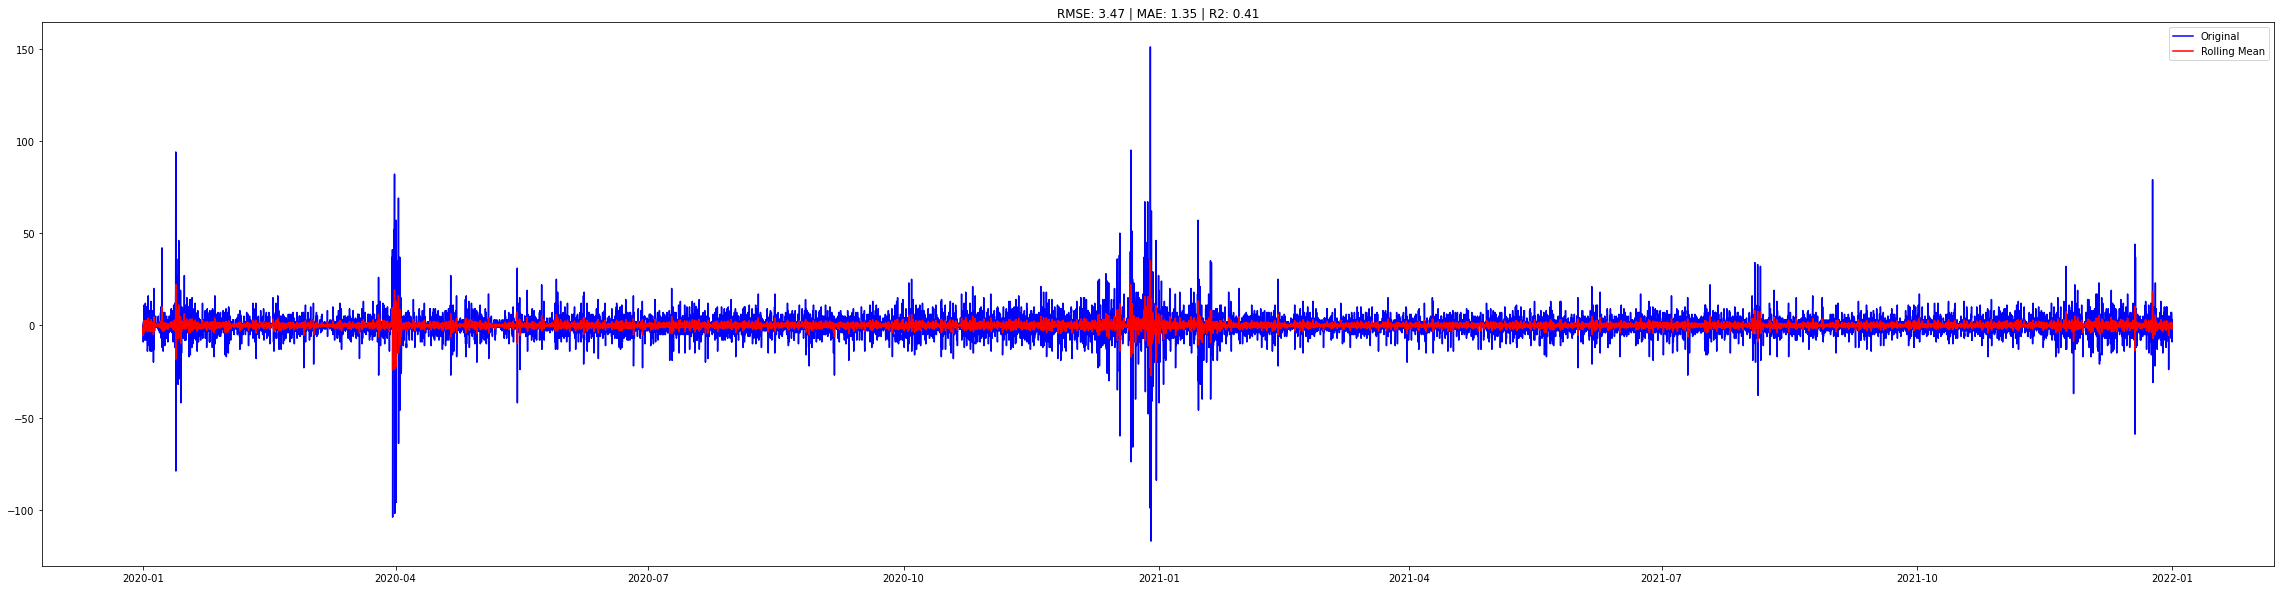

In [261]:
plt.figure(num=2, figsize=(40,10))
plt.plot(df_AQI_CD.AQI,color='blue', label='Original')
plt.plot(df_AQI_CD.predict,color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('RMSE: %.2f | MAE: %.2f | R2: %.2f'% (np.sqrt(sum((df_AQI_CD.predict-df_AQI_CD.AQI)**2)/df_AQI_CD.size),sum(abs(df_AQI_CD.predict-df_AQI_CD.AQI))/df_AQI_CD.size, 1-sum((df_AQI_CD.predict-df_AQI_CD.AQI)**2)/sum((df_AQI_CD.AQI - sum(df_AQI_CD.AQI)/df_AQI_CD.size)**2)))
plt.show()

## 凉山州 PM2.5

In [262]:
CQ_PM25 = data_raw.query("type=='PM2.5'")[["date", "hour", "type", "凉山州"]]
CQ_PM25["date_hour"]=CQ_PM25["date"].map(str)+CQ_PM25["hour"].map(str)
CQ_PM25["date_hour"] = CQ_PM25["date_hour"].map(lambda x: datetime.strptime(x, '%Y%m%d%H'))
CQ_PM25 = CQ_PM25[["date_hour", "凉山州"]].rename(columns={'凉山州':'PM25'}).set_index('date_hour')
CQ_PM25

,PM25
date_hour,
2020-01-01 00:00:00,37.0
2020-01-01 01:00:00,38.0
2020-01-01 02:00:00,31.0
2020-01-01 03:00:00,27.0
2020-01-01 04:00:00,28.0
...,...
2021-12-31 19:00:00,30.0
2021-12-31 20:00:00,23.0
2021-12-31 21:00:00,25.0


<Figure size 432x288 with 0 Axes>

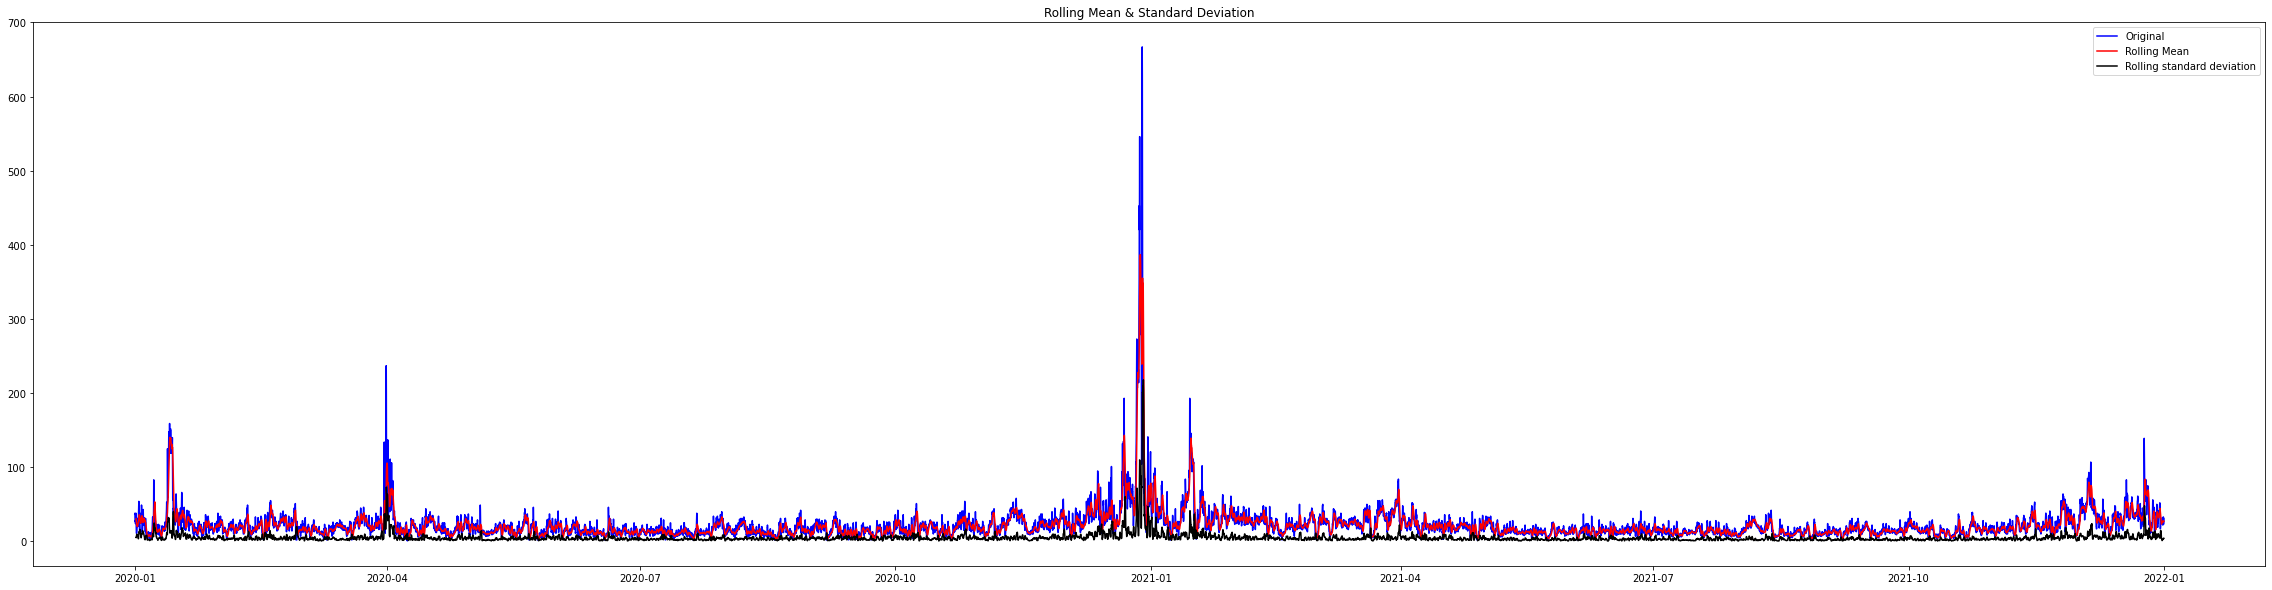

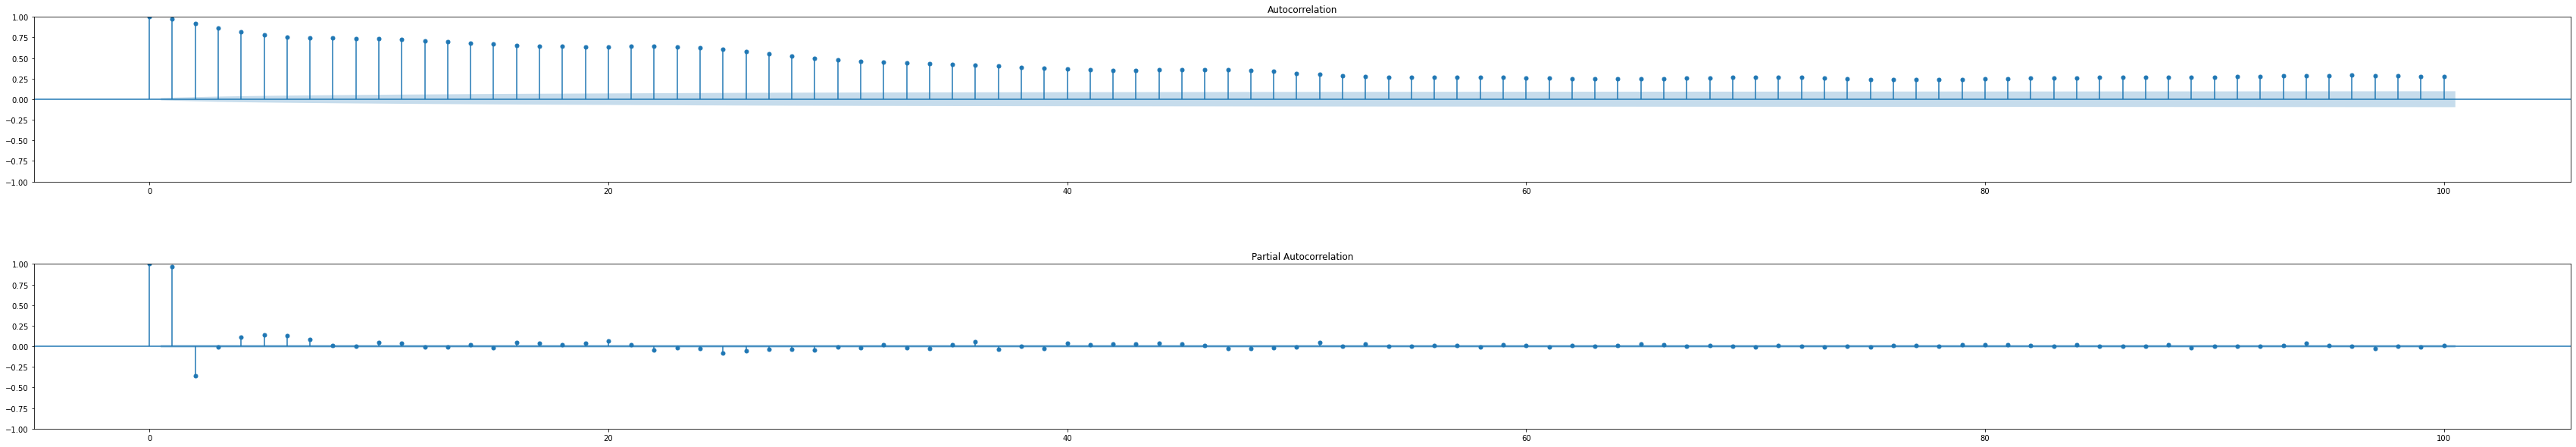

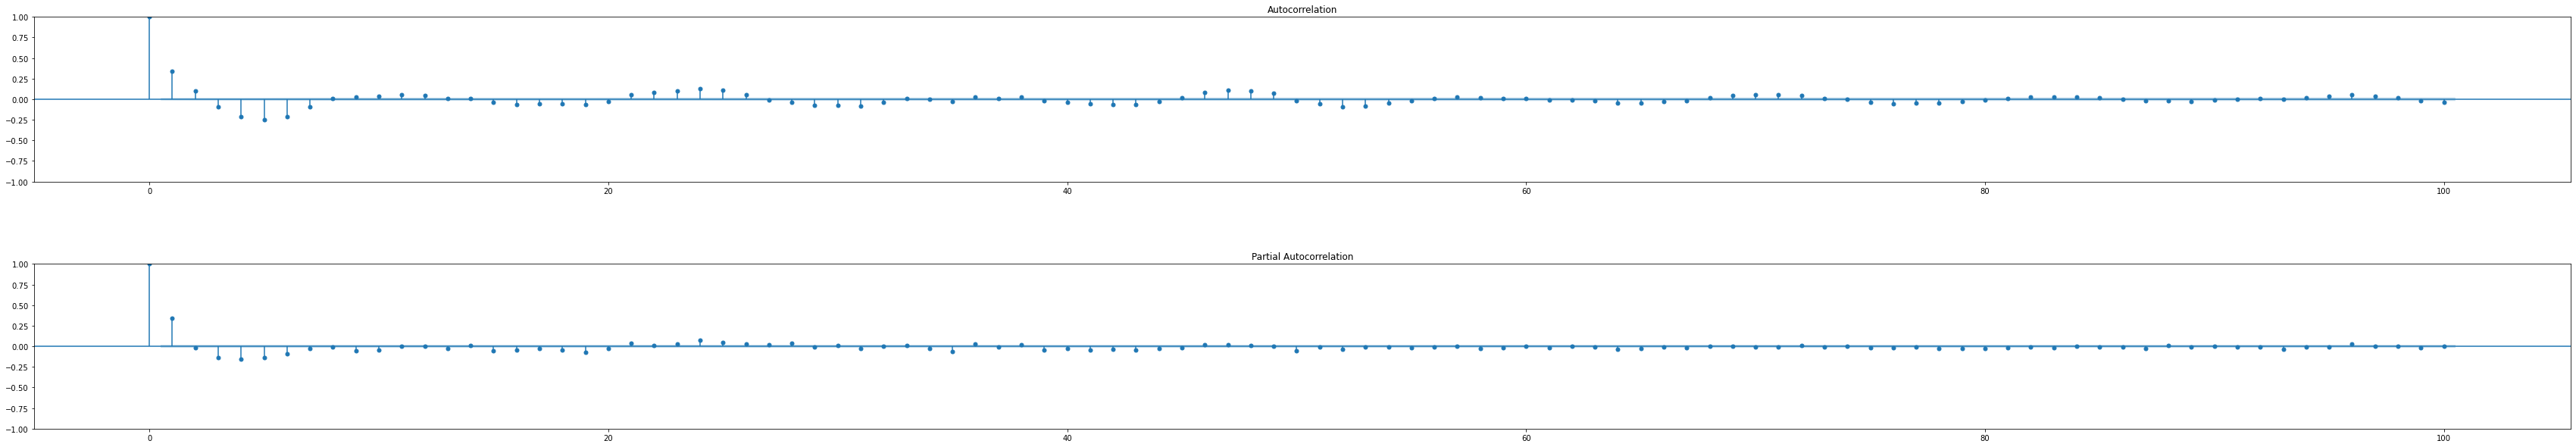

In [263]:
#缺失值
CQ_PM25[CQ_PM25.isnull().any(axis=1)==True]
CQ_PM25 = CQ_PM25.fillna(method='pad')
draw_trend(CQ_PM25,12)
teststationarity(CQ_PM25)
#t统计量在99%的置信水平下是显著的

draw_acf_pacf(CQ_PM25,100)
#一阶差分
diff_1 = CQ_PM25.diff(1).dropna()
draw_acf_pacf(diff_1,100)

In [264]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff_1, order=(1,1,1)) 
result_arima = model.fit()
predict_ts = result_arima.predict()
# 一阶差分还原
diff_shift_ts = diff_1.shift(1).squeeze()
df_predict = predict_ts.to_frame(name='predict')
df_PM25_CD = pd.merge(diff_shift_ts,df_predict,left_index=True,right_index=True)
df_PM25_CD = df_PM25_CD.dropna(axis=0)
df_PM25_CD

,PM25,predict
date_hour,,
2020-01-01 02:00:00,1.0,0.999986
2020-01-01 03:00:00,-7.0,-4.364596
2020-01-01 04:00:00,-4.0,-3.250794
2020-01-01 05:00:00,1.0,-0.700887
2020-01-01 06:00:00,-3.0,-2.446421
...,...,...
2021-12-31 19:00:00,0.0,-0.000129
2021-12-31 20:00:00,-3.0,-1.023760
2021-12-31 21:00:00,-7.0,-2.388714


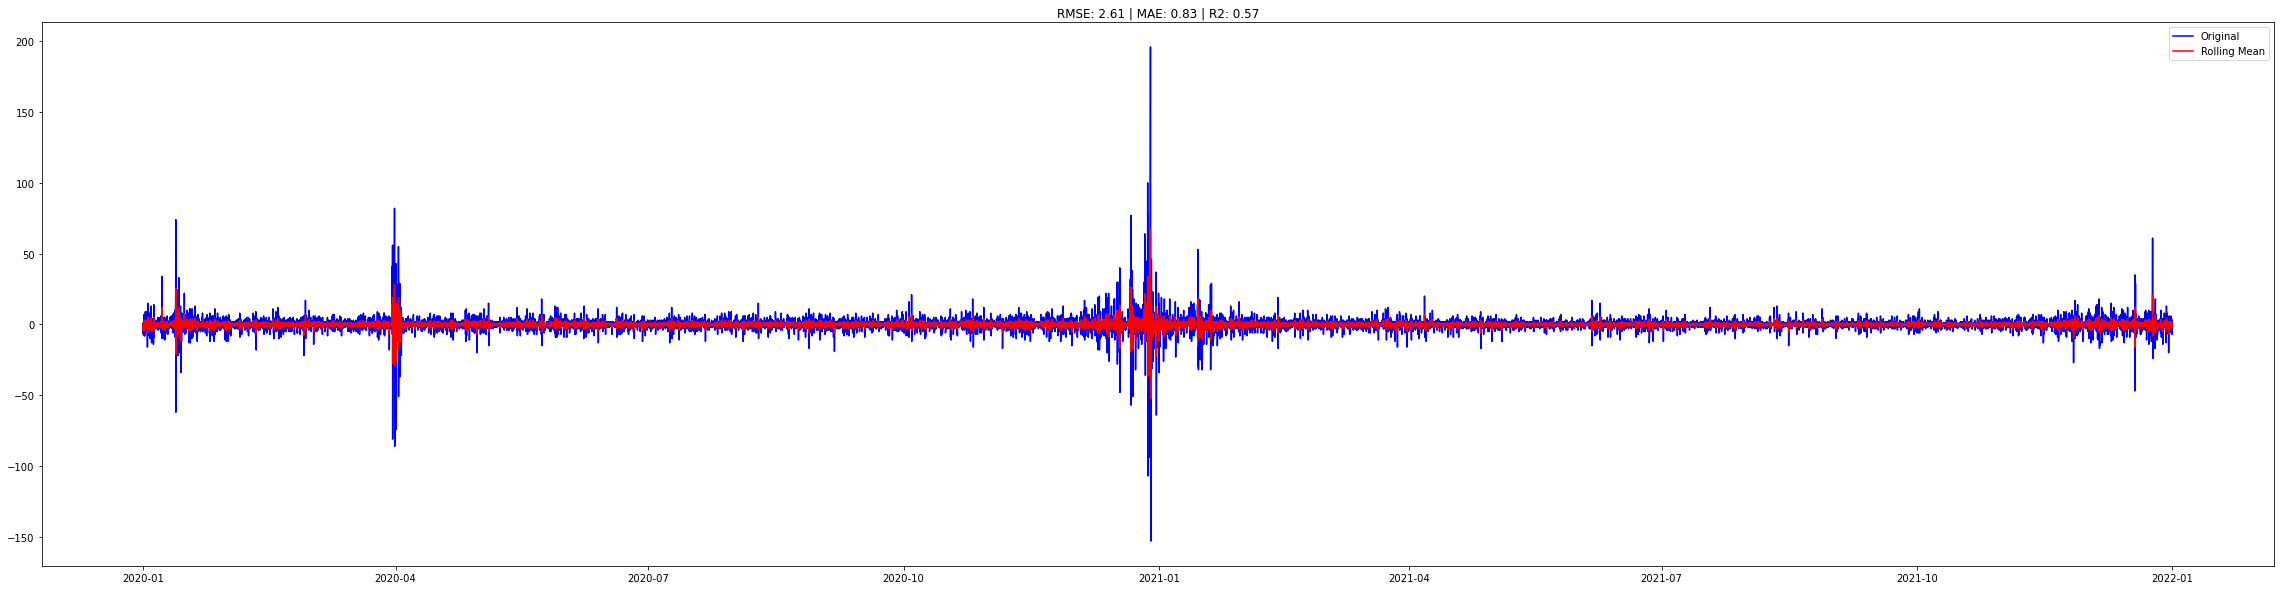

In [265]:
plt.figure(num=2, figsize=(40,10))
plt.plot(df_PM25_CD.PM25,color='blue', label='Original')
plt.plot(df_PM25_CD.predict,color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('RMSE: %.2f | MAE: %.2f | R2: %.2f'% (np.sqrt(sum((df_PM25_CD.predict-df_PM25_CD.PM25)**2)/df_PM25_CD.size),sum(abs(df_PM25_CD.predict-df_PM25_CD.PM25))/df_PM25_CD.size, 1-sum((df_PM25_CD.predict-df_PM25_CD.PM25)**2)/sum((df_PM25_CD.PM25 - sum(df_PM25_CD.PM25)/df_PM25_CD.size)**2)))
plt.show()

## 凉山州 PM10

<Figure size 432x288 with 0 Axes>

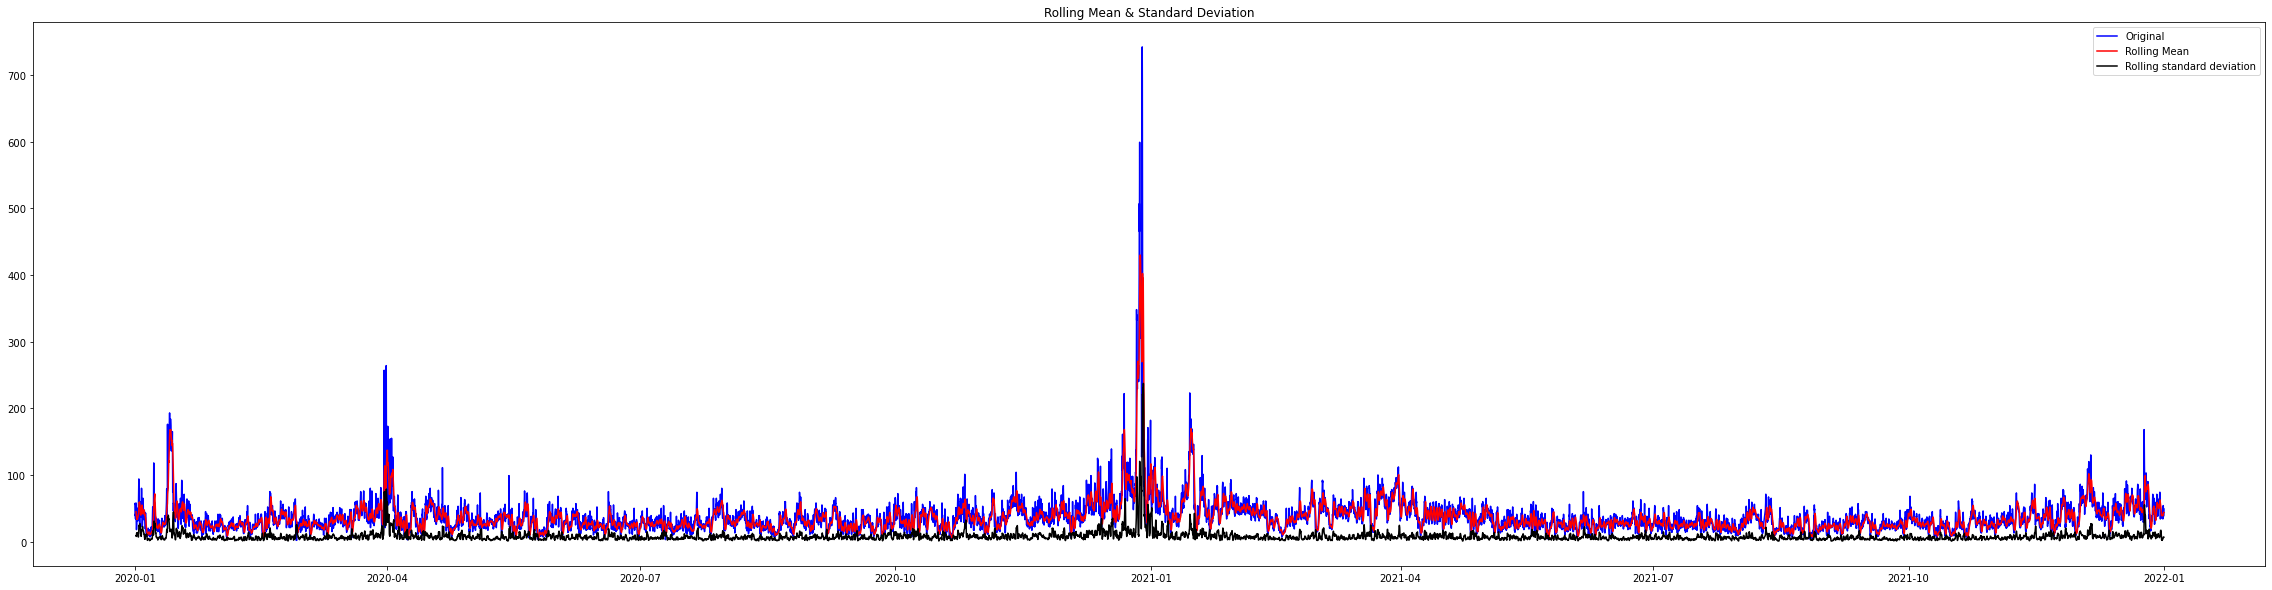

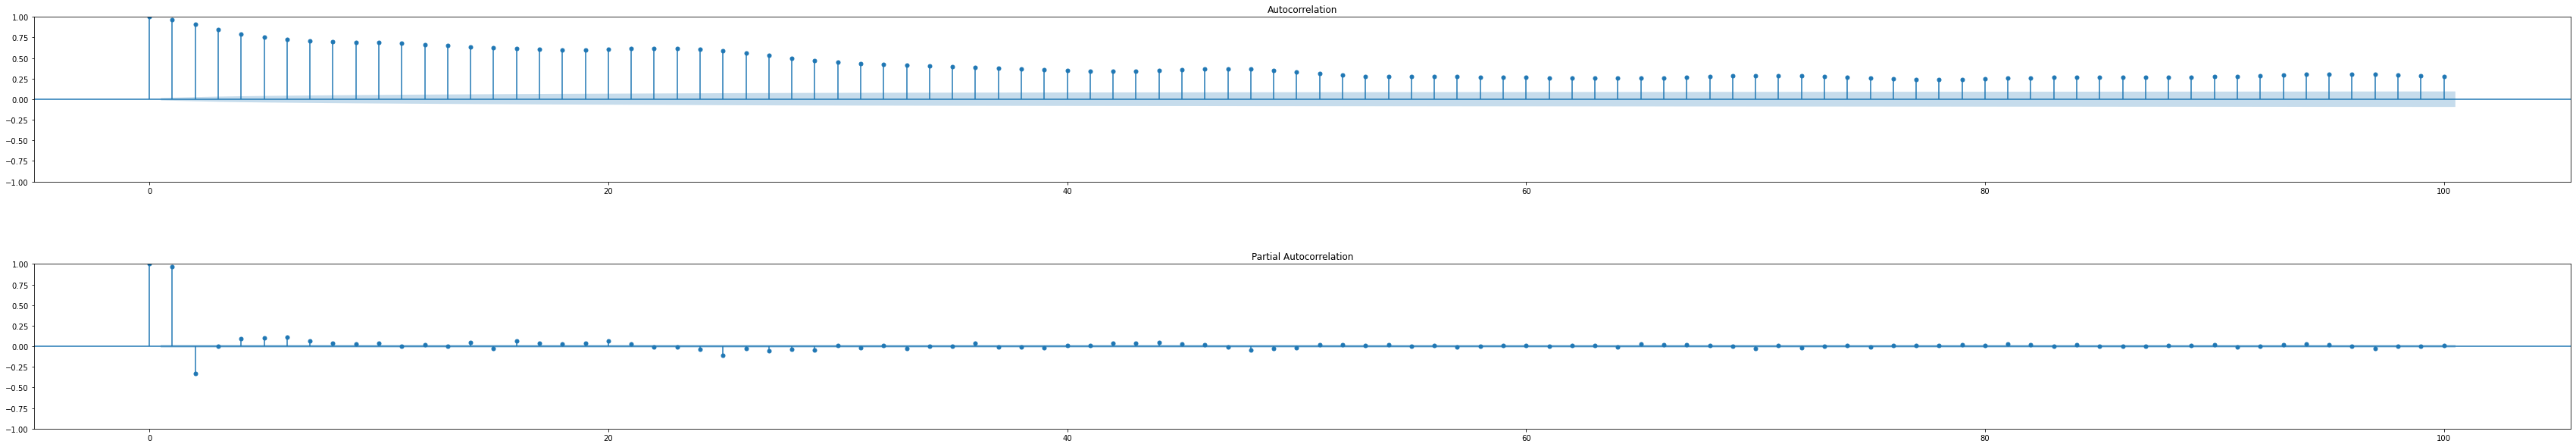

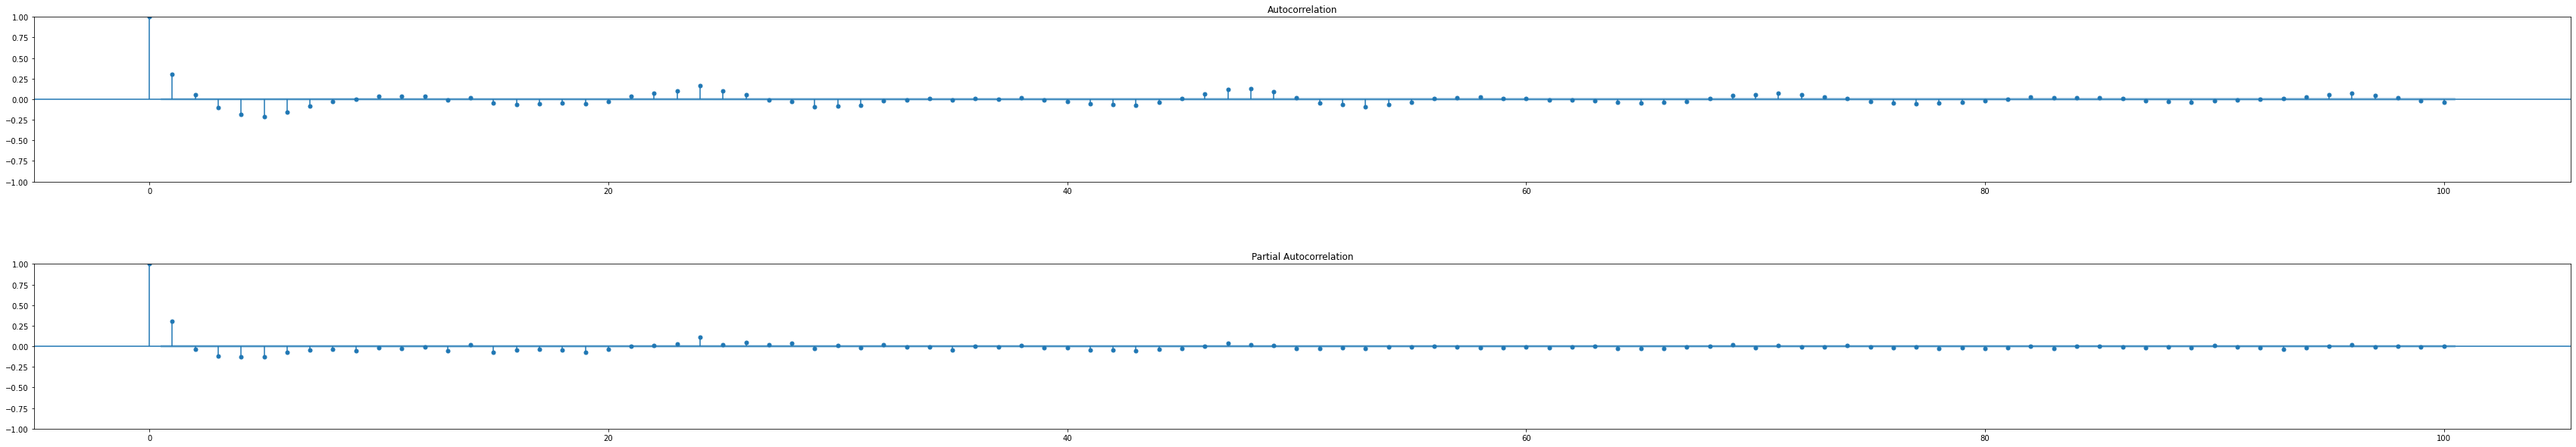

In [266]:
CQ_PM10 = data_raw.query("type=='PM10'")[["date", "hour", "type", "凉山州"]]
CQ_PM10["date_hour"]=CQ_PM10["date"].map(str)+CQ_PM10["hour"].map(str)
CQ_PM10["date_hour"] = CQ_PM10["date_hour"].map(lambda x: datetime.strptime(x, '%Y%m%d%H'))
CQ_PM10 = CQ_PM10[["date_hour", "凉山州"]].rename(columns={'凉山州':'PM10'}).set_index('date_hour')

#缺失值
CQ_PM10[CQ_PM10.isnull().any(axis=1)==True]
CQ_PM10 = CQ_PM10.fillna(method='pad')
draw_trend(CQ_PM10,12)
teststationarity(CQ_PM10)

draw_acf_pacf(CQ_PM10,100)
#一阶差分
diff_1 = CQ_PM10.diff(1).dropna()
draw_acf_pacf(diff_1,100)

In [267]:
model = ARIMA(diff_1, order=(1,1,1)) 
result_arima = model.fit()
predict_ts = result_arima.predict()
# 一阶差分还原
diff_shift_ts = diff_1.shift(1).squeeze()
df_predict = predict_ts.to_frame(name='predict')
df_PM10_CD = pd.merge(diff_shift_ts,df_predict,left_index=True,right_index=True)
df_PM10_CD = df_PM10_CD.dropna(axis=0)
df_PM10_CD

,PM10,predict
date_hour,,
2020-01-01 02:00:00,0.0,0.000000
2020-01-01 03:00:00,-12.0,-7.816622
2020-01-01 04:00:00,-6.0,-5.530345
2020-01-01 05:00:00,2.0,-1.561368
2020-01-01 06:00:00,-5.0,-4.266783
...,...,...
2021-12-31 19:00:00,-1.0,-0.302930
2021-12-31 20:00:00,-6.0,-1.817178
2021-12-31 21:00:00,-9.0,-2.725949


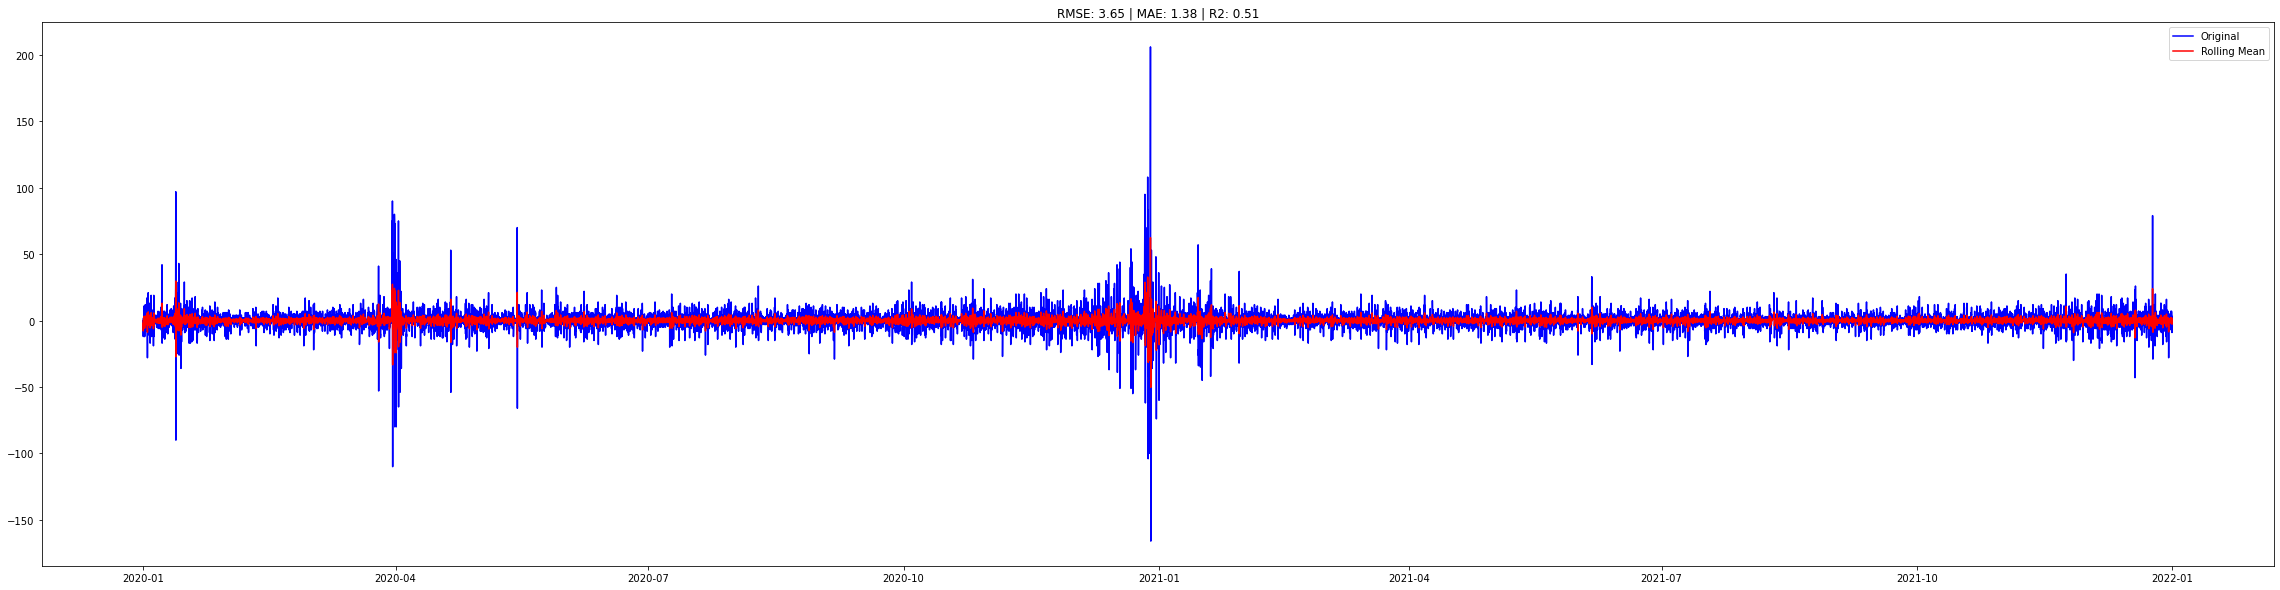

In [268]:
plt.figure(num=2, figsize=(40,10))
plt.plot(df_PM10_CD.PM10,color='blue', label='Original')
plt.plot(df_PM10_CD.predict,color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('RMSE: %.2f | MAE: %.2f | R2: %.2f'% (np.sqrt(sum((df_PM10_CD.predict-df_PM10_CD.PM10)**2)/df_PM10_CD.size),sum(abs(df_PM10_CD.predict-df_PM10_CD.PM10))/df_PM10_CD.size, 1-sum((df_PM10_CD.predict-df_PM10_CD.PM10)**2)/sum((df_PM10_CD.PM10 - sum(df_PM10_CD.PM10)/df_PM10_CD.size)**2)))
plt.show()